In [1]:
import numpy as np
import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import skimage
import scipy
from scipy.ndimage import gaussian_filter
from scipy.signal import medfilt
from IPython.display import display, HTML
display(HTML("<style>.container { width:65% !important; }</style>"))

c:\Users\Jorge\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
			   # DISTANCES
feats_list1 =  ['proximity', 'resident2intruder head-head', 'resident2intruder head-tti', 'intruder2resident head-tti',
			   # SOCIAL ORIENTATIONS
			   'resident2intruder head2centroid angle', 'intruder2resident head2centroid angle',
			   # SPEEDS
			   'resident centroid roc 100 ms', 'intruder centroid roc 100 ms', 'resident head roc 100 ms', 'intruder head roc 100 ms',
			   # POSTURAL INFORMATION
			   'resident centroid2nose angle', 'intruder centroid2nose angle', 'resident tti2head', 'intruder tti2head']

			   # DISTANCES
feats_list2 =  ['proximity', 'resident2intruder head-head', 'resident2intruder head-tti', 'intruder2resident head-tti',
			   # SOCIAL ORIENTATIONS
			   'resident2intruder head2centroid angle', 'intruder2resident head2centroid angle',
			   # SPEEDS
			   'resident centroid roc 100 ms', 'intruder centroid roc 100 ms', 'resident head roc 100 ms', 'intruder head roc 100 ms',
			   'resident centroid roc 100 ms sum across lags', 'intruder centroid roc 100 ms sum across lags', 'resident head roc 100 ms sum across lags', 'intruder head roc 100 ms sum across lags',
			   # IoU
			   'ious',
			   # POSTURAL INFORMATION
			   'resident centroid2nose angle', 'intruder centroid2nose angle', 'resident tti2head', 'intruder tti2head']

			   # DISTANCES
feats_list3 =  ['proximity', 'resident2intruder head-head', 'resident2intruder head-tti', 'intruder2resident head-tti',
			   # SOCIAL ORIENTATIONS
			   'resident2intruder head2centroid angle', 'intruder2resident head2centroid angle',
			   # SPEEDS
			   'resident centroid roc 100 ms', 'intruder centroid roc 100 ms', 'resident head roc 100 ms', 'intruder head roc 100 ms',
			   'resident centroid roc 100 ms sum across lags', 'intruder centroid roc 100 ms sum across lags', 'resident head roc 100 ms sum across lags', 'intruder head roc 100 ms sum across lags',
			   # IoU and pixel change
			   'ious',
			   # POSTURAL INFORMATION
			   'resident centroid2nose angle', 'intruder centroid2nose angle', 'resident tti2head', 'intruder tti2head']

			   # DISTANCES
feats_list4 =  ['proximity', 'resident2intruder head-head', 'resident2intruder head-tti', 'intruder2resident head-tti',
			   # SOCIAL ORIENTATIONS
			   'resident2intruder head2centroid angle', 'intruder2resident head2centroid angle',
			   # SPEEDS
			   'resident centroid roc 100 ms', 'intruder centroid roc 100 ms', 'resident head roc 100 ms', 'intruder head roc 100 ms', 'proximity roc 100 ms',
			   'resident centroid roc 100 ms sum across lags', 'intruder centroid roc 100 ms sum across lags', 'resident head roc 100 ms sum across lags', 'intruder head roc 100 ms sum across lags',
			   'proximity roc 100 ms sum across lags',
			   # IoU and pixel change
			   'ious',
			   # POSTURAL INFORMATION
			   'resident centroid2nose angle', 'intruder centroid2nose angle', 'resident tti2head', 'intruder tti2head']

			   # DISTANCES
feats_list5 =  ['proximity', 'proximity median across lags', 'resident2intruder head-head', 'resident2intruder head-head median across lags', 'resident2intruder head-tti', 'intruder2resident head-tti',
			   # SOCIAL ORIENTATIONS
			   'resident2intruder head2centroid angle', 'intruder2resident head2centroid angle',
			   # SPEEDS
			   'resident centroid roc 100 ms', 'intruder centroid roc 100 ms', 'resident head roc 100 ms', 'intruder head roc 100 ms', 'proximity roc 100 ms',
			   'resident centroid roc 100 ms sum across lags', 'intruder centroid roc 100 ms sum across lags', 'resident head roc 100 ms sum across lags', 'intruder head roc 100 ms sum across lags',
			   'proximity roc 100 ms sum across lags',
			   # IoU and pixel change
			   'ious',
			   # POSTURAL INFORMATION
			   'resident centroid2nose angle', 'intruder centroid2nose angle', 'resident tti2head', 'intruder tti2head']


feats_list = list(set(feats_list1 + feats_list2 + feats_list3 + feats_list4 + feats_list5))
feats_list.sort()
feats_list = np.asarray(feats_list)

from tqdm import tqdm

features = {}
implanted_list = ['3095', '3096', '3097', '4013', '4014', '4015', '4016', '29L', '30R2', '30B', '91R2', '30L', '87R2', '87L', '87B', '87L2', '86L', '86L2', '933R', '927R','927L','583L2','583B']
feats_path = "E:\\data\\processed_features_020924\\"
feat_pickles = np.sort([x for x in os.listdir(feats_path) if 'zscored' in x])
feats_path2 = "E:\\data\\processed_features_071724\\"
feat_pickles2 = np.sort([x for x in os.listdir(feats_path2) if 'zscored' in x])

for session in tqdm(np.sort(feat_pickles)):
    if any(imp in session for imp in implanted_list):
        n = 4
    else:
        n = 3
    z = pd.read_parquet(feats_path + session, columns=feats_list)
    features['_'.join(session.split('_')[:n])] = z
    
for session in tqdm(np.sort(feat_pickles2)):
    if any(imp in session for imp in implanted_list):
        n = 4
    else:
        n = 3
    z = pd.read_parquet(feats_path2 + session, columns=feats_list)
    features['_'.join(session.split('_')[:n])] = z

100%|██████████| 87/87 [00:20<00:00,  4.18it/s]


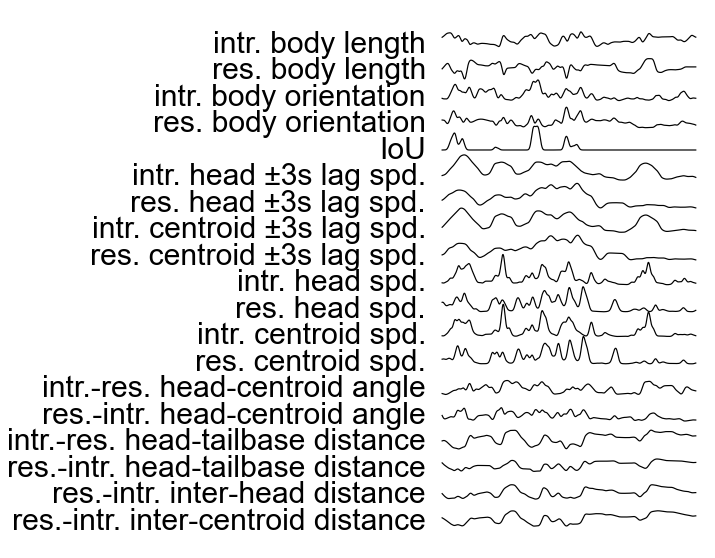

In [43]:
feat_names = ['res.-intr. inter-centroid distance', 'res.-intr. inter-head distance', 'res.-intr. head-tailbase distance', 'intr.-res. head-tailbase distance', 'res.-intr. head-centroid angle', 
              'intr.-res. head-centroid angle', 'res. centroid spd.', 'intr. centroid spd.', 'res. head spd.', 'intr. head spd.', 'res. centroid ±3s lag spd.', 'intr. centroid ±3s lag spd.', 
              'res. head ±3s lag spd.', 'intr. head ±3s lag spd.', 'IoU', 'res. body orientation', 'intr. body orientation', 'res. body length', 'intr. body length']

plt.figure(figsize=(5, 10))
for i, feat in enumerate(feats_list3):
	feat2plot = features['87R2_d9_toyCD1_t2'][feat].values[7000:9000]
	plt.plot(feat2plot + i*5, color='black', linewidth=1.2)
sns.despine(bottom=True, left=True)
plt.gca().tick_params(axis='y', which='both', length=0)
plt.yticks(np.arange(0, len(feats_list3)*5, 5), feat_names, fontsize=30, fontname='Arial');
plt.xticks([])
plt.savefig('.\\figures\\paper_figs\\features.svg', dpi=600, bbox_inches='tight')
	

### Clusters

In [3]:
def extract_events_of_interest(labels):
    events = []
    indices = []
    start_idx = None

    for i in range(len(labels)):
        if labels[i] == 1:
            if start_idx is None:
                start_idx = i
            indices.append(i)
        elif start_idx is not None:
            if len(indices) >= 2:
                events.append(indices)
            start_idx = None
            indices = []

    if start_idx is not None and len(indices) >= 1:
        events.append(np.asarray(indices))
    return events

def map_cluster_data(animals, unsupervised_data_full, clusters, beh='agg'):
    
    trials_across_animals = np.zeros((len(clusters), 27, len(animals)))
    trials_across_animals[:] = np.nan
    occupancies_across_animals = trials_across_animals.copy()
    persistence_across_animals = trials_across_animals.copy()
    
    for a, animal in enumerate(animals):
        
        sessions2map = list(unsupervised_data_full.keys())
        
        if beh == 'agg':
            sessions2map = [x for x in sessions2map if animal in x if '_balbc_' in x or '_mCD1_' in x]
        elif beh == 'obs':
            sessions2map = [x for x in sessions2map if animal in x if '_obs_' in x or '_OBSmCD1_' in x]
        else:
            sessions2map = [x for x in sessions2map if animal in x if 'toy' in x or 'toyCD1' in x]
            
        for s, session in enumerate(sessions2map):
            
            sample = unsupervised_data_full[session]
            ntrials, occupancies, persistences = get_unsupervised_trials(sample, clusters)
            trials_across_animals[:, s, a] = ntrials
            occupancies_across_animals[:, s, a] = occupancies
            persistence_across_animals[:, s, a] = persistences

    return trials_across_animals, occupancies_across_animals, persistence_across_animals

def get_unsupervised_trials(session_binary_labels, clusters):
    
    ntrials = np.zeros((len(clusters)))
    occupancies = ntrials.copy()
    persistences = ntrials.copy()
    
    for i in np.arange(len(clusters)):    

        y = session_binary_labels[:, i]
        y = y[~np.isnan(y)]

        events = extract_events_of_interest(y)
        ntrials[i] = len(events)
        if len(events) == 0:
            persistences[i] = 0
        else:
      	 	persistences[i] = np.nanmedian([len(x)/40 for x in events])
            
        try:
            stacked_events = np.hstack(events)
            occupancies[i] =len(stacked_events)/len(y)
        except ValueError:
            print('Found error!')
            occupancies[i] = 0
            
    return ntrials, occupancies, persistences

def map_cluster_transitions(animals, full_data, clusters, beh='agg'):
    
    transition_matrices = np.zeros((len(clusters), len(clusters), 3, len(animals)))    
    
    for a, animal in enumerate(animals):
        
        sessions2map = list(unsupervised_data_full.keys())
        
        if beh == 'agg':
            sessions2map = [x for x in sessions2map if animal in x if '_mCD1_' in x]
        elif beh == 'obs':
            sessions2map = [x for x in sessions2map if animal in x if '_OBSmCD1_' in x]
        else:
            sessions2map = [x for x in sessions2map if animal in x if 'toyCD1' in x]
            
        for s, session in enumerate(sessions2map):
            
            vec = full_data[session]['unsupervised labels'].values.astype(int)
            for i in range(len(vec) - 1):
                if vec[i] != vec[i+1]:  # Exclude same-number transitions
                    transition_matrices[vec[i]-1][vec[i+1]-1, s, a] += 1

    row_sums = transition_matrices.sum(axis=1, keepdims=True)
    normalized_transition_matrices = transition_matrices / row_sums
    
    return normalized_transition_matrices

### Defining clusters

In [4]:
agg_animals = ['3095', '3096', '3097', '4013', '4014', '4015', '4016', '91R2', '30L', '30B']
obs_animals = ['30R2', '29L', '86L', '87L2', '927R', '927L', '933R']
non_animals = ['87R2', '87L', '87B', '86L2', '583L2', '583B']
full_data = pd.read_pickle('fully_labeled_traces_feats3_071924.pickle')
clusters = np.unique(full_data['29L_d1_balbc_t1']['unsupervised labels'])
n_clusters = len(clusters)

# Make binary labels out of cluster time series

unsupervised_data_full = {}

for key in full_data.keys():
    sample = full_data[key]['unsupervised labels']
    unsupervised_binary_labels = np.zeros((len(sample), len(clusters)))
    for i, label in enumerate(sample):
        unsupervised_binary_labels[i, int(label)-1] = 1
    unsupervised_data_full[key] = unsupervised_binary_labels

# extract trial info

agg_cluster_trials, agg_cluster_occupancies, agg_cluster_persistence = map_cluster_data(agg_animals, unsupervised_data_full, clusters, beh='agg')
obs_cluster_trials, obs_cluster_occupancies, obs_cluster_persistence = map_cluster_data(obs_animals, unsupervised_data_full, clusters, beh='obs')
non_cluster_trials, non_cluster_occupancies, non_cluster_persistence = map_cluster_data(non_animals, unsupervised_data_full, clusters, beh='non')

Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!
Found error!

In [5]:
sns.set_context(rc={'lines.linewidth': 2.5,
                    'axes.labelsize': 25,
                    'axes.titlesize': 19.200000000000003,
                    'font.size': 25,
                    'xtick.major.width': 8,
                    'ytick.major.width': 8,
                    'xtick.major.size':6,
                    'ytick.major.size':6,
                    'axes.linewidth':4})

Text(0, 0.5, 'cluster #')

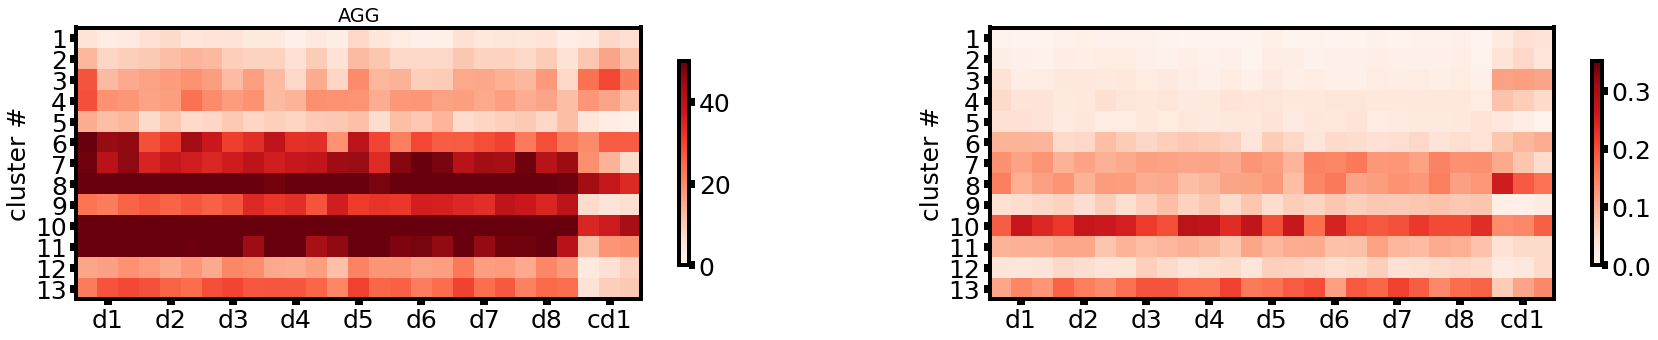

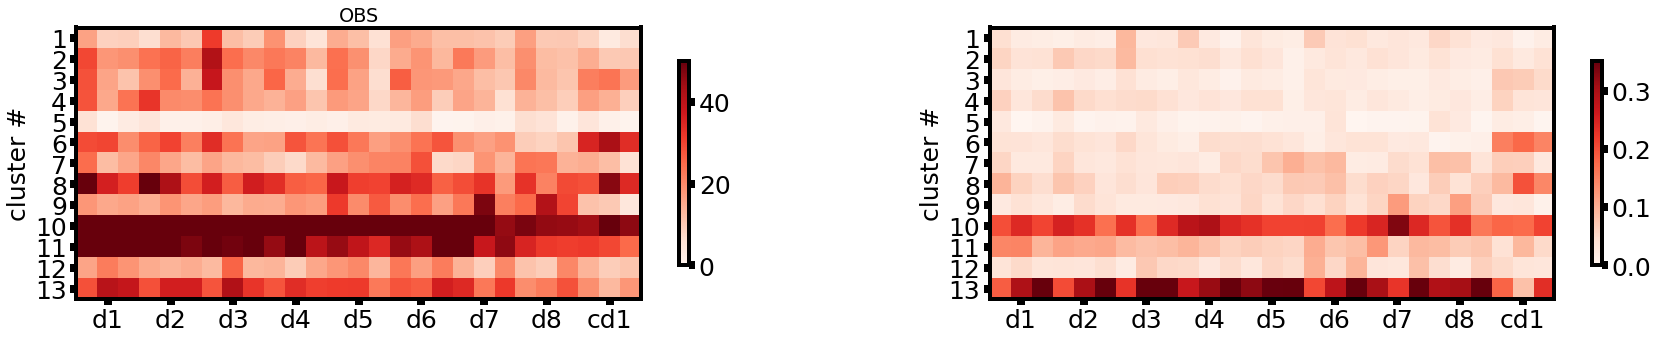

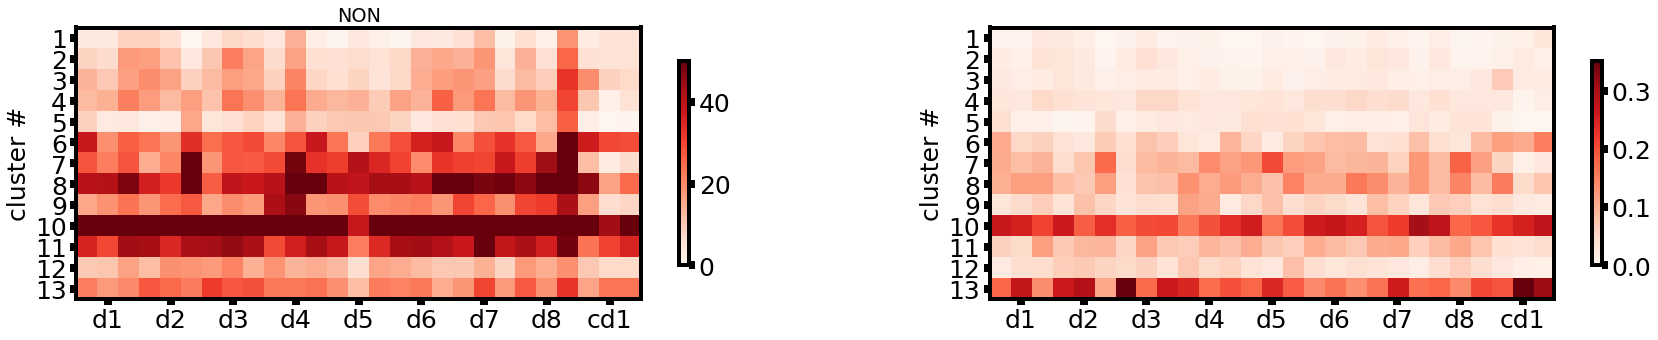

In [ ]:
n_clusters = len(np.unique(full_data['29L_d1_balbc_t1']['unsupervised labels']))
fig, ax = plt.subplots(1, 2, figsize=(30, 5))
ax[0].set_title('AGG')
im = ax[0].imshow(np.nanmean(agg_cluster_trials, axis=2), cmap='Reds', vmin=0, vmax=50)
fig.colorbar(im, ax=ax[0], shrink=0.75)
ax[0].set_yticks(np.arange(n_clusters), np.arange(1, n_clusters+1).astype(int))
ax[0].set_xticks(np.arange(1, 26, 3), ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'cd1'])
ax[0].set_ylabel('cluster #')

im = ax[1].imshow(np.nanmean(agg_cluster_occupancies, axis=2), vmin=0, vmax=0.35, cmap='Reds')
fig.colorbar(im, ax=ax[1], shrink=0.75)
ax[1].set_yticks(np.arange(n_clusters), np.arange(1, n_clusters+1).astype(int))
ax[1].set_xticks(np.arange(1, 26, 3), ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'cd1'])
ax[1].set_ylabel('cluster #')
# plt.colorbar()

fig, ax = plt.subplots(1, 2, figsize=(30, 5))
ax[0].set_title('OBS')
im = ax[0].imshow(np.nanmean(obs_cluster_trials, axis=2), cmap='Reds', vmin=0, vmax=50)
fig.colorbar(im, ax=ax[0], shrink=0.75)
ax[0].set_yticks(np.arange(n_clusters), np.arange(1, n_clusters+1).astype(int))
ax[0].set_xticks(np.arange(1, 26, 3), ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'cd1'])
ax[0].set_ylabel('cluster #')

im = ax[1].imshow(np.nanmean(obs_cluster_occupancies, axis=2), vmin=0, vmax=0.35, cmap='Reds')
fig.colorbar(im, ax=ax[1], shrink=0.75)
ax[1].set_yticks(np.arange(n_clusters), np.arange(1, n_clusters+1).astype(int))
ax[1].set_xticks(np.arange(1, 26, 3), ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'cd1'])
ax[1].set_ylabel('cluster #')

fig, ax = plt.subplots(1, 2, figsize=(30, 5))
ax[0].set_title('NON')
im = ax[0].imshow(np.nanmean(non_cluster_trials, axis=2), cmap='Reds', vmin=0, vmax=50)
fig.colorbar(im, ax=ax[0], shrink=0.75)
ax[0].set_yticks(np.arange(n_clusters), np.arange(1, n_clusters+1).astype(int))
ax[0].set_xticks(np.arange(1, 26, 3), ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'cd1'])
ax[0].set_ylabel('cluster #')
im = ax[1].imshow(np.nanmean(non_cluster_occupancies, axis=2), vmin=0, vmax=0.35, cmap='Reds')
fig.colorbar(im, ax=ax[1], shrink=0.75)
ax[1].set_yticks(np.arange(n_clusters), np.arange(1, n_clusters+1).astype(int))
ax[1].set_xticks(np.arange(1, 26, 3), ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'cd1'])
ax[1].set_ylabel('cluster #')

In [321]:
# stats config

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests

def run_cluster_stats(data2plot):

    agg_roi_activity = data2plot[0][np.isnan(data2plot[0])==False]
    obs_roi_activity = data2plot[1][np.isnan(data2plot[1])==False]
    non_roi_activity = data2plot[2][np.isnan(data2plot[2])==False]

    # Add the data to the DataFrame
    df = pd.DataFrame({
        'Activity': np.concatenate([agg_roi_activity, obs_roi_activity, non_roi_activity]),
        'Group': np.concatenate([['agg'] * len(agg_roi_activity), ['obs'] * len(obs_roi_activity), ['non'] * len(non_roi_activity)]),
    })

    # Test for normality
    _, p_agg = stats.shapiro(agg_roi_activity)
    _, p_obs = stats.shapiro(obs_roi_activity)
    _, p_non = stats.shapiro(non_roi_activity)
    if p_agg > 0.05 and p_obs > 0.05 and p_non > 0.05:
        # Perform the one-way ANOVA
        model = sm.OLS.from_formula('Activity ~ C(Group)', data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print("F = %f, p = %f" % (anova_table['F'][0], anova_table['PR(>F)'][0]))
        if anova_table['PR(>F)'][0] <= 0.1:
            t1, p_agg_non = stats.ttest_ind(agg_roi_activity, non_roi_activity)
            t2, p_obs_non = stats.ttest_ind(obs_roi_activity, non_roi_activity)
            t3, p_agg_obs = stats.ttest_ind(agg_roi_activity, obs_roi_activity)
            multiple_tests = multipletests([p_agg_non, p_agg_obs, p_obs_non], method='fdr_tsbh')
            print('AGG vs NON; t = %f, p = %f' % (t1, multiple_tests[1][0]))
            print('AGG vs OBS; t = %f, p = %f' % (t3, multiple_tests[1][1]))
            print('OBS vs NON; t = %f, p = %f' % (t2, multiple_tests[1][2]))
    else:
        # Perform Kruskal-Wallis H-test
        kruskal_result = stats.kruskal(agg_roi_activity, obs_roi_activity, non_roi_activity)
        print("H = %f, p = %f" % (kruskal_result.statistic, kruskal_result.pvalue))
        if kruskal_result.pvalue <= 0.1:
            t1, p_agg_non = stats.mannwhitneyu(agg_roi_activity, non_roi_activity)
            t2, p_obs_non = stats.mannwhitneyu(obs_roi_activity, non_roi_activity)
            t3, p_agg_obs = stats.mannwhitneyu(agg_roi_activity, obs_roi_activity)
            multiple_tests = multipletests([p_agg_non, p_agg_obs, p_obs_non], method='fdr_tsbh')
            print('AGG vs NON; U = %f, p = %f' % (t1, multiple_tests[1][0]))
            print('AGG vs OBS; U = %f, p = %f' % (t3, multiple_tests[1][1]))
            print('OBS vs NON; U = %f, p = %f' % (t2, multiple_tests[1][2]))
    print('###')

Cluster 1 occupancies
H = 0.865424, p = 0.648747
###
Cluster 2 occupancies
F = 2.864476, p = 0.080552
AGG vs NON; t = 2.572346, p = 0.066409
AGG vs OBS; t = 0.051009, p = 0.959992
OBS vs NON; t = 2.085714, p = 0.091638
###
Cluster 3 occupancies
F = 12.556902, p = 0.000293
AGG vs NON; t = 4.229157, p = 0.000841
AGG vs OBS; t = 3.491950, p = 0.001639
OBS vs NON; t = 1.195960, p = 0.085619
###
Cluster 4 occupancies
F = 11.544556, p = 0.000464
AGG vs NON; t = 4.999954, p = 0.000584
AGG vs OBS; t = 2.321549, p = 0.036792
OBS vs NON; t = 2.375513, p = 0.036792
###
Cluster 5 occupancies
H = 6.918144, p = 0.031459
AGG vs NON; U = 55.000000, p = 0.009491
AGG vs OBS; U = 40.000000, p = 0.446044
OBS vs NON; U = 32.500000, p = 0.115582
###
Cluster 6 occupancies
F = 2.864251, p = 0.080567
AGG vs NON; t = -2.678990, p = 0.053943
AGG vs OBS; t = -1.703270, p = 0.163712
OBS vs NON; t = -0.582867, p = 0.571738
###
Cluster 7 occupancies
H = 4.251449, p = 0.119346
###
Cluster 8 occupancies
F = 6.029993, 

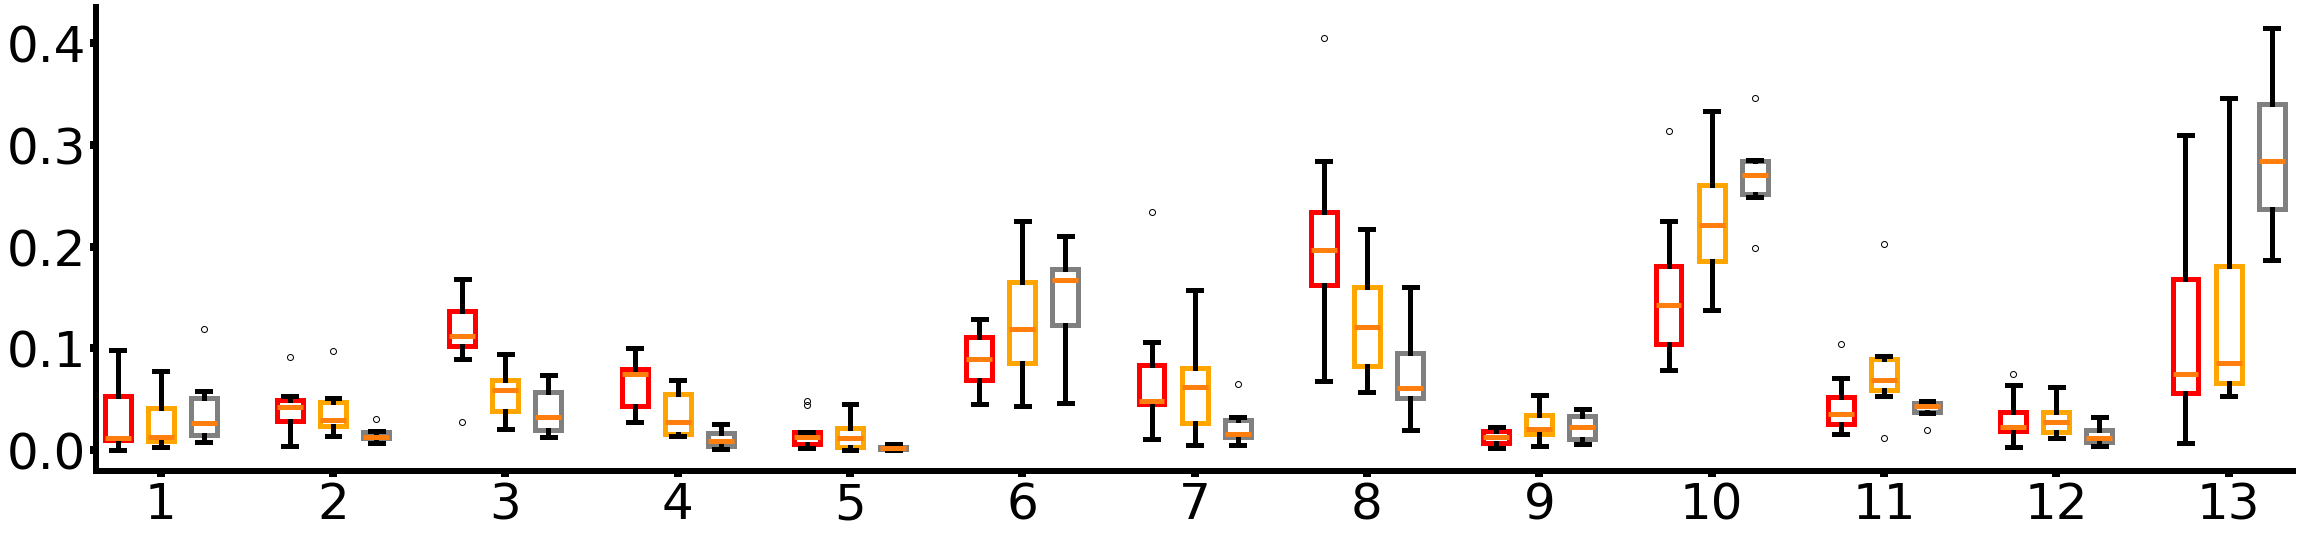

In [322]:
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_context(rc={'lines.linewidth': 2.5,
                    'axes.labelsize': 25,
                    'axes.titlesize': 19.200000000000003,
                    'font.size': 25,
                    'xtick.major.width': 8,
                    'ytick.major.width': 8,
                    'xtick.major.size':6,
                    'ytick.major.size':6,
                    'axes.linewidth':6})

### stats validation of CD1 behaviors
plt.close()
cd1_agg_trials, cd1_agg_occupancies, cd1_agg_persistence = np.nanmean(agg_cluster_trials[:, -3:, :], axis=1), np.nanmean(agg_cluster_occupancies[:, -3:, :], axis=1), np.nanmean(agg_cluster_persistence[:, -3:, :], axis=1)
cd1_obs_trials, cd1_obs_occupancies, cd1_obs_persistence = np.nanmean(obs_cluster_trials[:, -3:, :], axis=1), np.nanmean(obs_cluster_occupancies[:, -3:, :], axis=1), np.nanmean(obs_cluster_persistence[:, -3:, :], axis=1)
cd1_non_trials, cd1_non_occupancies, cd1_non_persistence = np.nanmean(non_cluster_trials[:, -3:, :], axis=1), np.nanmean(non_cluster_occupancies[:, -3:, :], axis=1), np.nanmean(non_cluster_persistence[:, -3:, :], axis=1)

### plotting
fig, axs = plt.subplots(figsize=(2.5* n_clusters, 8))  # Adjust figure size as needed

for i in np.arange(n_clusters):
    data_to_plot = [cd1_agg_occupancies[i], cd1_obs_occupancies[i], cd1_non_occupancies[i]]
    print('Cluster %i occupancies' % (i+1))
    run_cluster_stats(data_to_plot)
    
    # Calculate positions for this cluster's boxplots
    positions = np.arange(1, 4) + (i * 4)  # Adjust spacing between groups here
    
    # Plot boxplots for this cluster
    box = plt.boxplot(data_to_plot, positions=positions, patch_artist=True, widths=0.6)  # Adjust widths as needed
    
    # Customize boxplots
    colors = ['red', 'orange', 'gray']
    for patch, color in zip(box['boxes'], colors):
        patch.set_edgecolor(color)
        patch.set_facecolor('white')
        patch.set_linewidth(5)
    for median in box['medians']:
        median.set_linewidth(5)
    for whisker in box['whiskers']:
        whisker.set_linewidth(5)
    for cap in box['caps']:
        cap.set_linewidth(5)
    
   

# Set a common title and other figure-level customizations
sns.despine()
plt.yticks(fontsize=50)
plt.xticks(np.linspace(2, 50, 13), np.arange(1, 14), fontsize=50)

# Adjust layout
plt.tight_layout()

# plt.savefig('.\\GRC2024_figs\\cluster_occupancies.svg')


Cluster 1 occupancies
H = 0.865424, p = 0.648747
###
Cluster 2 occupancies
F = 2.864476, p = 0.080552
AGG vs NON; t = 2.572346, p = 0.066409
AGG vs OBS; t = 0.051009, p = 0.959992
OBS vs NON; t = 2.085714, p = 0.091638
###
Cluster 3 occupancies
F = 12.556902, p = 0.000293
AGG vs NON; t = 4.229157, p = 0.000841
AGG vs OBS; t = 3.491950, p = 0.001639
OBS vs NON; t = 1.195960, p = 0.085619
###
Cluster 4 occupancies
F = 11.544556, p = 0.000464
AGG vs NON; t = 4.999954, p = 0.000584
AGG vs OBS; t = 2.321549, p = 0.036792
OBS vs NON; t = 2.375513, p = 0.036792
###
Cluster 5 occupancies
H = 6.918144, p = 0.031459
AGG vs NON; U = 55.000000, p = 0.009491
AGG vs OBS; U = 40.000000, p = 0.446044
OBS vs NON; U = 32.500000, p = 0.115582
###
Cluster 6 occupancies
F = 2.864251, p = 0.080567
AGG vs NON; t = -2.678990, p = 0.053943
AGG vs OBS; t = -1.703270, p = 0.163712
OBS vs NON; t = -0.582867, p = 0.571738
###
Cluster 7 occupancies
H = 4.251449, p = 0.119346
###
Cluster 8 occupancies
F = 6.029993, 

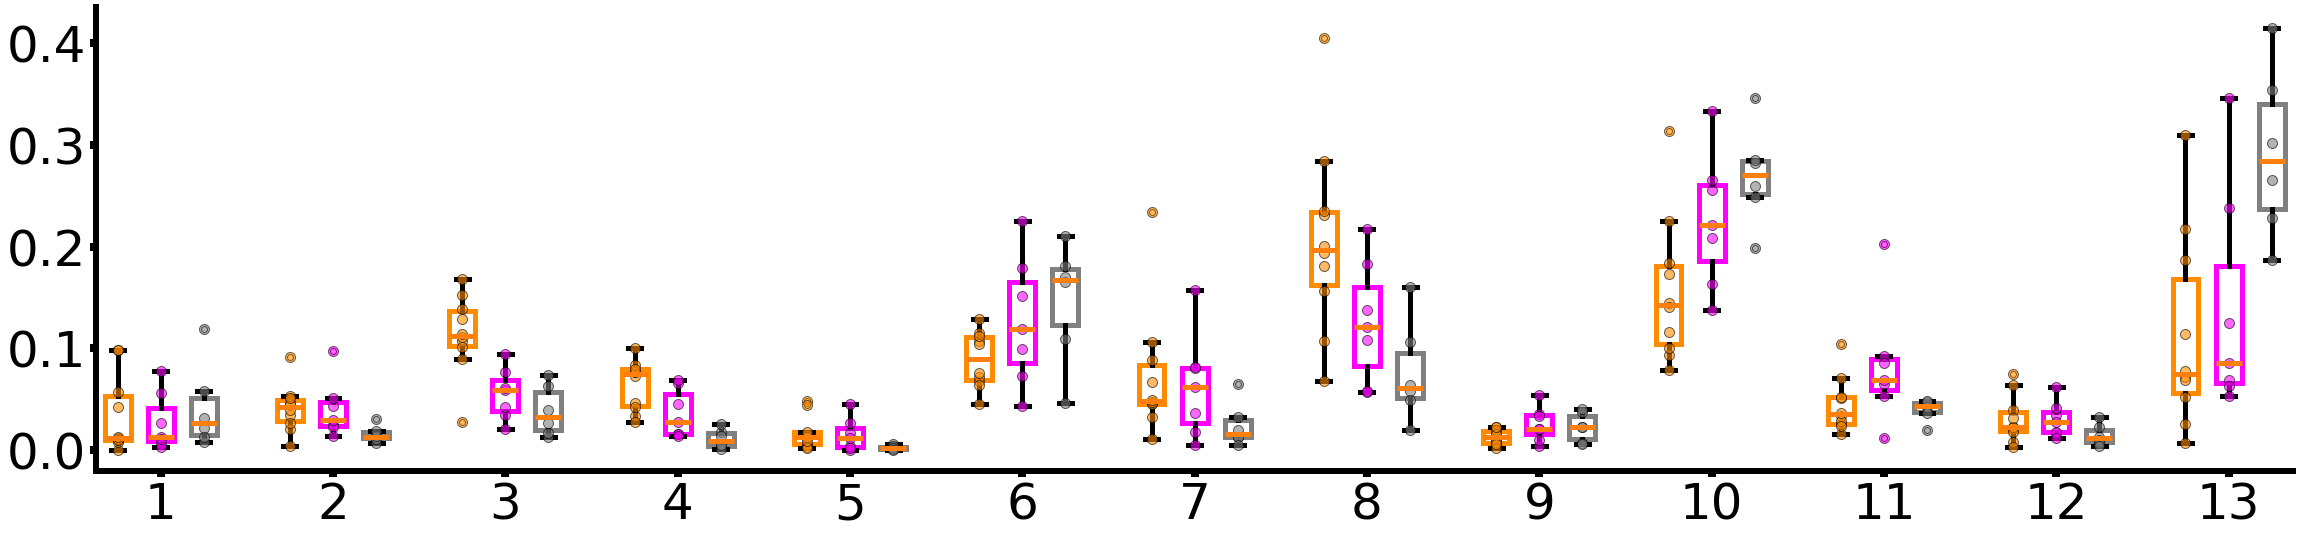

In [449]:
sns.set_context(rc={'lines.linewidth': 2.5,
                    'axes.labelsize': 25,
                    'axes.titlesize': 19.200000000000003,
                    'font.size': 25,
                    'xtick.major.width': 8,
                    'ytick.major.width': 8,
                    'xtick.major.size':6,
                    'ytick.major.size':6,
                    'axes.linewidth':6})

### stats validation of CD1 behaviors
plt.close()
cd1_agg_trials, cd1_agg_occupancies, cd1_agg_persistence = np.nanmean(agg_cluster_trials[:, -3:, :], axis=1), np.nanmean(agg_cluster_occupancies[:, -3:, :], axis=1), np.nanmean(agg_cluster_persistence[:, -3:, :], axis=1)
cd1_obs_trials, cd1_obs_occupancies, cd1_obs_persistence = np.nanmean(obs_cluster_trials[:, -3:, :], axis=1), np.nanmean(obs_cluster_occupancies[:, -3:, :], axis=1), np.nanmean(obs_cluster_persistence[:, -3:, :], axis=1)
cd1_non_trials, cd1_non_occupancies, cd1_non_persistence = np.nanmean(non_cluster_trials[:, -3:, :], axis=1), np.nanmean(non_cluster_occupancies[:, -3:, :], axis=1), np.nanmean(non_cluster_persistence[:, -3:, :], axis=1)

### plotting
fig, axs = plt.subplots(figsize=(2.5 * n_clusters, 8))  # Adjust figure size as needed

for i in np.arange(n_clusters):
    data_to_plot = [cd1_agg_occupancies[i], cd1_obs_occupancies[i], cd1_non_occupancies[i]]
    print('Cluster %i occupancies' % (i + 1))
    run_cluster_stats(data_to_plot)
    
    # Calculate positions for this cluster's boxplots
    positions = np.arange(1, 4) + (i * 4)  # Adjust spacing between groups here
    
    # Plot boxplots for this cluster
    box = plt.boxplot(data_to_plot, positions=positions, patch_artist=True, widths=0.6)  # Adjust widths as needed
    
    # Customize boxplots
    colors = ['darkorange', 'magenta', 'gray']
    for patch, color in zip(box['boxes'], colors):
        patch.set_edgecolor(color)
        patch.set_facecolor('white')
        patch.set_linewidth(5)
    for median in box['medians']:
        median.set_linewidth(5)
    for whisker in box['whiskers']:
        whisker.set_linewidth(5)
    for cap in box['caps']:
        cap.set_linewidth(5)
    
    # Plot individual data points
    for j, data in enumerate(data_to_plot):
        plt.scatter(np.full_like(data, positions[j]), data, color=colors[j], edgecolor='black', zorder=2, s=100, alpha=0.6)

# Set a common title and other figure-level customizations
sns.despine()
plt.yticks(fontsize=50)
plt.xticks(np.linspace(2, 50, 13), np.arange(1, 14), fontsize=50)

# Adjust layout
plt.tight_layout()

plt.savefig('.\\figures\\cluster_occupancies.svg')
plt.show()

Cluster 1 occupancies
F = 1.428307, p = 0.263136
###
Cluster 2 occupancies
H = 0.754384, p = 0.685784
###
Cluster 3 occupancies
F = 0.319547, p = 0.730119
###
Cluster 4 occupancies
F = 2.769416, p = 0.086754
AGG vs NON; t = 2.940024, p = 0.021512
AGG vs OBS; t = 0.824533, p = 0.281703
OBS vs NON; t = 1.168811, p = 0.267185
###
Cluster 5 occupancies
F = 2.745553, p = 0.088392
AGG vs NON; t = 2.499500, p = 0.076474
AGG vs OBS; t = 0.765793, p = 0.455682
OBS vs NON; t = 1.555035, p = 0.222331
###
Cluster 6 occupancies
F = 5.112662, p = 0.016091
AGG vs NON; t = -3.162652, p = 0.013831
AGG vs OBS; t = -1.372171, p = 0.126789
OBS vs NON; t = -1.772116, p = 0.104036
###
Cluster 7 occupancies
H = 1.195031, p = 0.550177
###
Cluster 8 occupancies
H = 1.619451, p = 0.444980
###
Cluster 9 occupancies
F = 1.444163, p = 0.259513
###
Cluster 10 occupancies
F = 4.317289, p = 0.027631
AGG vs NON; t = -3.554188, p = 0.006349
AGG vs OBS; t = -1.847129, p = 0.084548
OBS vs NON; t = -0.768821, p = 0.305460

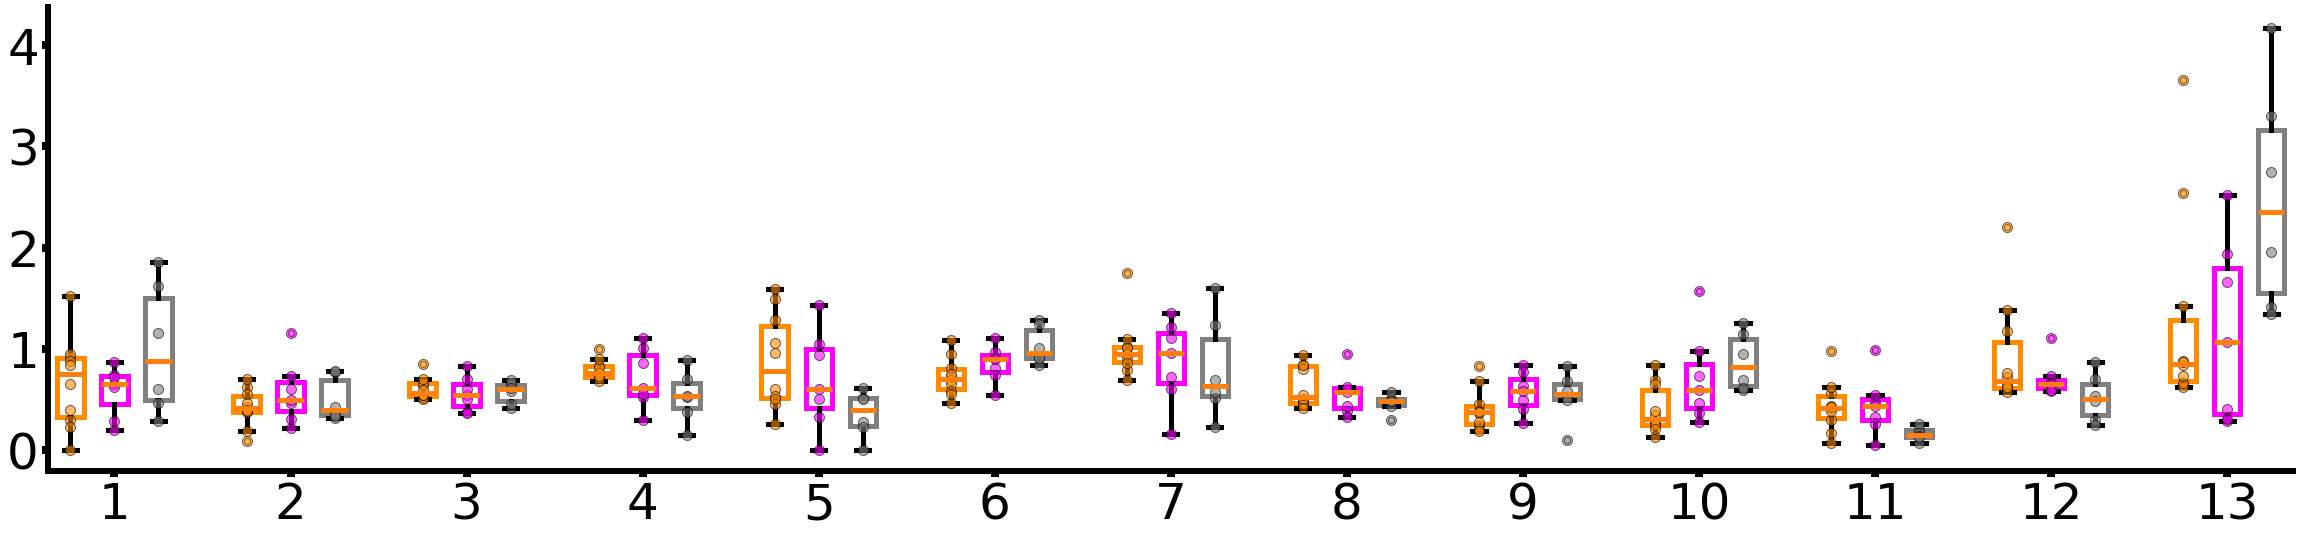

In [463]:
cd1_agg_persistence = np.where(np.isnan(cd1_agg_persistence), 0, cd1_agg_persistence)
cd1_obs_persistence = np.where(np.isnan(cd1_obs_persistence), 0, cd1_obs_persistence)
cd1_non_persistence = np.where(np.isnan(cd1_non_persistence), 0, cd1_non_persistence)

### plotting
fig, axs = plt.subplots(figsize=(2.5 * n_clusters, 8))  # Adjust figure size as needed

for i in np.arange(n_clusters):
    data_to_plot = [cd1_agg_persistence[i], cd1_obs_persistence[i], cd1_non_persistence[i]]
    print('Cluster %i occupancies' % (i + 1))
    run_cluster_stats(data_to_plot)
    
    # Calculate positions for this cluster's boxplots
    positions = np.arange(1, 4) + (i * 4)  # Adjust spacing between groups here
    
    # Plot boxplots for this cluster
    box = plt.boxplot(data_to_plot, positions=positions, patch_artist=True, widths=0.6)  # Adjust widths as needed
    
    # Customize boxplots
    colors = ['darkorange', 'magenta', 'gray']
    for patch, color in zip(box['boxes'], colors):
        patch.set_edgecolor(color)
        patch.set_facecolor('white')
        patch.set_linewidth(5)
    for median in box['medians']:
        median.set_linewidth(5)
    for whisker in box['whiskers']:
        whisker.set_linewidth(5)
    for cap in box['caps']:
        cap.set_linewidth(5)
    
    # Plot individual data points
    for j, data in enumerate(data_to_plot):
        plt.scatter(np.full_like(data, positions[j]), data, color=colors[j], edgecolor='black', zorder=2, s=100, alpha=0.6)

# Set a common title and other figure-level customizations
sns.despine()
plt.yticks(fontsize=50)
plt.xticks(np.linspace(2, 50, 13), np.arange(1, 14), fontsize=50)

# Adjust layout
plt.tight_layout()

# plt.savefig('.\\figures\\cluster_persistence.svg')
plt.show()

Decoding using vector occupancy / persistence

In [102]:
# SVM classification using cluster occupancies
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import shuffle

# Define the data

agg_X = agg_cluster_occupancies[:, -3:, :].reshape(13, 30)
obs_X = obs_cluster_occupancies[:, -3:, :].reshape(13, 21)
non_X = non_cluster_occupancies[:, -3:, :].reshape(13, 18)

X = np.concatenate([agg_X, obs_X, non_X], axis=1).T
y = np.array([1]*agg_X.shape[1] + [2]*obs_X.shape[1] + [3]*non_X.shape[1]).reshape(1, -1).T

# Initialize leave-one-out cross-validator
loo = LeaveOneOut()

# Initialize model
model = SVC()

# Store predictions
predictions = []

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X_train, y_train.ravel())
    
    # Predict the test sample
    y_pred = model.predict(X_test)
    
    # Store the prediction
    predictions.append(y_pred[0])

# Evaluate the model
print('Evaluation on the test set:')
test_accuracy = accuracy_score(y, predictions)
test_f1 = f1_score(y, predictions, average='weighted')
print(f'Accuracy: {test_accuracy:.2f}')
print(f'F1 Score: {test_f1:.2f}')

# Create null distribution
num_shuffles = 1000
null_accuracies = []
null_f1s = []
from tqdm import tqdm
for _ in tqdm(range(num_shuffles)):
    y_shuffled = shuffle(y)
    null_predictions = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y_shuffled[train_index], y_shuffled[test_index]
        
        # Train the model
        model.fit(X_train, y_train.ravel())
        
        # Predict the test sample
        y_pred = model.predict(X_test)
        
        # Store the prediction
        null_predictions.append(y_pred[0])
    
    # Evaluate the model on shuffled data
    null_accuracies.append(accuracy_score(y, null_predictions))
    null_f1s.append(f1_score(y, null_predictions, average='weighted'))

Evaluation on the test set:
Accuracy: 0.68
F1 Score: 0.68


100%|██████████| 1000/1000 [00:31<00:00, 31.54it/s]


In [111]:
p_value_accuracy = np.mean(np.array(null_accuracies) >= test_accuracy)
print(f'p-value for accuracy: {p_value_accuracy:.3f}')
p_value_f1 = np.mean(np.array(null_f1s) >= test_f1)
print(f'p-value for F1 score: {p_value_f1:.3f}')

p-value for accuracy: 0.000
p-value for F1 score: 0.000


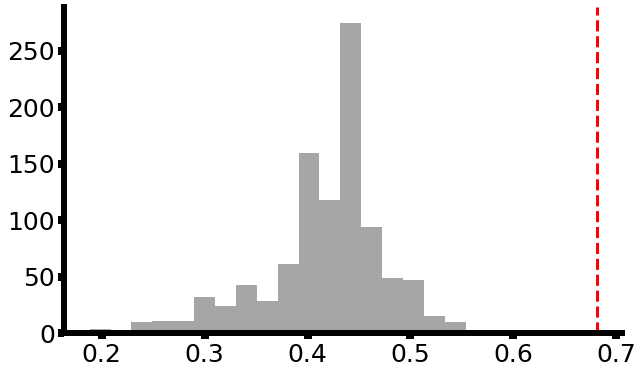

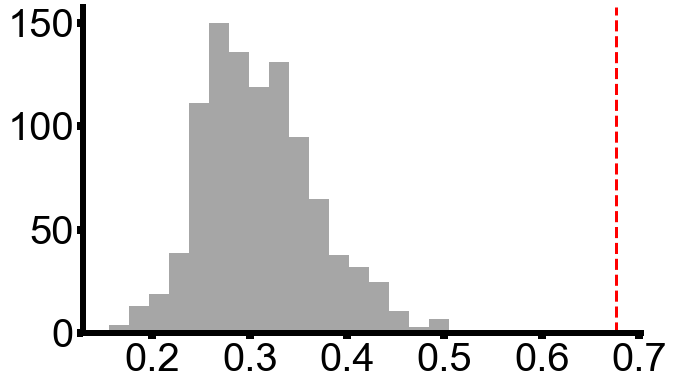

In [114]:
# Plot the null distribution and test accuracy
plt.figure(figsize=(10, 6))
plt.hist(null_accuracies, bins=20, alpha=0.7, label='Null Distribution', color='gray')
plt.axvline(test_accuracy, color='red', linestyle='dashed', linewidth=3, label='Test Accuracy')
sns.despine()

# Plot the null distribution and test F1 score
plt.figure(figsize=(10, 6))
plt.hist(null_f1s, bins=20, alpha=0.7, label='Null Distribution', color='gray')
plt.axvline(test_f1, color='red', linestyle='dashed', linewidth=3, label='Test Accuracy')
plt.xticks(fontsize=40, fontfamily='Arial')
plt.yticks(fontsize=40, fontfamily='Arial')
sns.despine()
plt.savefig('.\\figures\\paper_figs\\occupancy_LOO_F1_score.svg')


In [11]:
# SVM classification using cluster persistences
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import shuffle

# Define the data

agg_X = agg_cluster_persistence[:, -3:, :].reshape(13, 30)
obs_X = obs_cluster_persistence[:, -3:, :].reshape(13, 21)
non_X = non_cluster_persistence[:, -3:, :].reshape(13, 18)

X = np.concatenate([agg_X, obs_X, non_X], axis=1).T
y = np.array([1]*agg_X.shape[1] + [2]*obs_X.shape[1] + [3]*non_X.shape[1]).reshape(1, -1).T

# Initialize leave-one-out cross-validator
loo = LeaveOneOut()

# Initialize model
model = SVC()

# Store predictions
predictions = []

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X_train, y_train.ravel())
    
    # Predict the test sample
    y_pred = model.predict(X_test)
    
    # Store the prediction
    predictions.append(y_pred[0])

# Evaluate the model
print('Evaluation on the test set:')
test_accuracy = accuracy_score(y, predictions)
test_f1 = f1_score(y, predictions, average='weighted')
print(f'Accuracy: {test_accuracy:.2f}')
print(f'F1 Score: {test_f1:.2f}')

# Create null distribution
num_shuffles = 1000
null_accuracies = []
null_f1s = []
from tqdm import tqdm
for _ in tqdm(range(num_shuffles)):
    y_shuffled = shuffle(y)
    null_predictions = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y_shuffled[train_index], y_shuffled[test_index]
        
        # Train the model
        model.fit(X_train, y_train.ravel())
        
        # Predict the test sample
        y_pred = model.predict(X_test)
        
        # Store the prediction
        null_predictions.append(y_pred[0])
    
    # Evaluate the model on shuffled data
    null_accuracies.append(accuracy_score(y, null_predictions))
    null_f1s.append(f1_score(y, null_predictions, average='weighted'))

Evaluation on the test set:
Accuracy: 0.45
F1 Score: 0.37


100%|██████████| 1000/1000 [00:32<00:00, 30.91it/s]


In [12]:
p_value_accuracy = np.mean(np.array(null_accuracies) >= test_accuracy)
print(f'p-value for accuracy: {p_value_accuracy:.3f}')
p_value_f1 = np.mean(np.array(null_f1s) >= test_f1)
print(f'p-value for F1 score: {p_value_f1:.3f}')

p-value for accuracy: 0.260
p-value for F1 score: 0.123


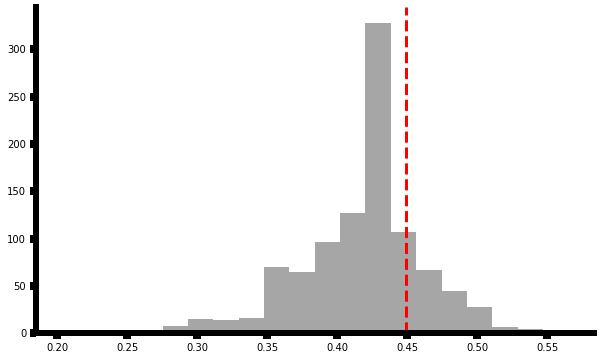

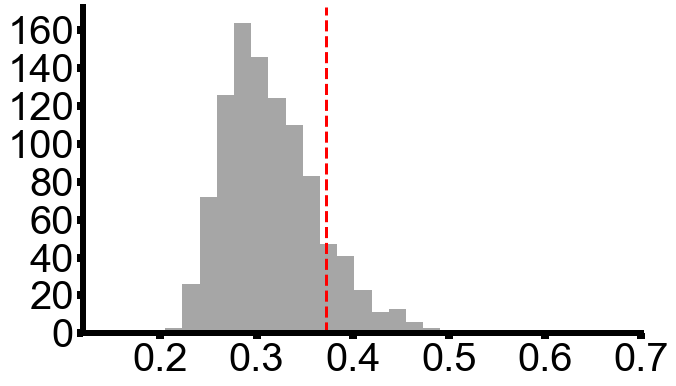

In [13]:
# Plot the null distribution and test accuracy
plt.figure(figsize=(10, 6))
plt.hist(null_accuracies, bins=20, alpha=0.7, label='Null Distribution', color='gray')
plt.axvline(test_accuracy, color='red', linestyle='dashed', linewidth=3, label='Test Accuracy')
sns.despine()

# Plot the null distribution and test F1 score
plt.figure(figsize=(10, 6))
plt.hist(null_f1s, bins=20, alpha=0.7, label='Null Distribution', color='gray')
plt.axvline(test_f1, color='red', linestyle='dashed', linewidth=3, label='Test Accuracy')
plt.xlim(0.12, 0.7)
plt.xticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7], fontsize=40, fontfamily='Arial')
plt.yticks(fontsize=40, fontfamily='Arial')
sns.despine()
plt.savefig('.\\figures\\persistence_LOO_F1_score.svg')


Assessing group similarities

Occupancy:

In [373]:
from scipy.spatial.distance import jensenshannon
agg_HF_occupancies = agg_cluster_occupancies[:, -3:, :] 
obs_HF_occupancies = obs_cluster_occupancies[:, -3:, :]
non_HF_occupancies = non_cluster_occupancies[:, -3:, :]
all_occupancies = np.concatenate([agg_HF_occupancies, obs_HF_occupancies, non_HF_occupancies], axis=-1)
dists = np.zeros((3, 3, all_occupancies.shape[-1], all_occupancies.shape[-1]))
dists[:] = np.nan
for animal in np.arange(all_occupancies.shape[-1]):
    for session1 in np.arange(3):
        sample = all_occupancies[:, session1, animal]
        for second_animal in np.arange(all_occupancies.shape[-1]):
            if second_animal==animal:
                continue
            for session2 in np.arange(3):
                sample2 = all_occupancies[:, session2, second_animal]
                dists[session1, session2, animal, second_animal] = jensenshannon(sample, sample2)

    

0.003445546203961758
0.11534391534391535


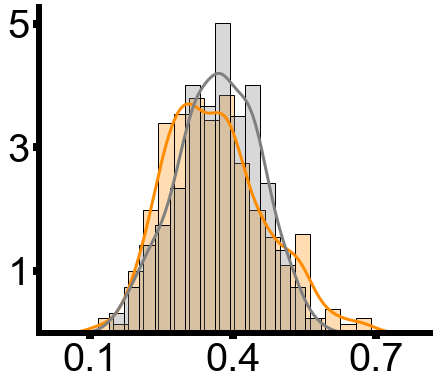

In [352]:
# similarity in occupancies
from scipy.stats import ks_2samp
obs_agg_dists = dists[:, :, 10:17, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
obs_non_dists = dists[:, :, 10:17, 17:]

# define distributions
distb1 = obs_agg_dists.flatten()
distb2 = obs_non_dists.flatten()

# Plot KDEs
fig, ax = plt.subplots(figsize=(7, 6))
sns.histplot(distb1, ax=ax, stat='density', color='darkorange', kde=False, alpha=0.3)
sns.kdeplot(distb1, ax=ax, color='darkorange', lw=3)
sns.histplot(distb2, ax=ax, stat='density', color='gray', kde=False, alpha=0.3)
sns.kdeplot(distb2, ax=ax, color='gray', lw=3)
sns.despine()
plt.ylabel('')
plt.yticks([1, 3, 5], fontfamily='Arial', fontsize=40)
plt.xticks([0.1, 0.4, 0.7], fontfamily='Arial', fontsize=40)

ks_statistic, p_value = ks_2samp(distb1, distb2)
print(p_value)
print(ks_statistic)


# plt.savefig('.\\figures\\JS_divergence_distb_occupancy_shorter.svg', dpi=300)

Persistence:

In [456]:
from scipy.spatial.distance import jensenshannon
agg_HF_persistence = agg_cluster_persistence[:, -3:, :] 
obs_HF_persistence = obs_cluster_persistence[:, -3:, :]
non_HF_persistence = non_cluster_persistence[:, -3:, :]
all_persistence = np.concatenate([agg_HF_persistence, obs_HF_persistence, non_HF_persistence], axis=-1)
dists = np.zeros((3, 3, all_persistence.shape[-1], all_persistence.shape[-1]))
dists[:] = np.nan
for animal in np.arange(all_persistence.shape[-1]):
    for session1 in np.arange(3):
        sample = all_persistence[:, session1, animal]
        for second_animal in np.arange(all_persistence.shape[-1]):
            if second_animal==animal:
                continue
            for session2 in np.arange(3):
                sample2 = all_persistence[:, session2, second_animal]
                # dists[session1, session2, animal, second_animal] = jensenshannon(sample, sample2)
                dists[session1, session2, animal, second_animal] = np.linalg.norm(sample - sample2)

    

0.21904761904761905
2.1156643104092154e-10


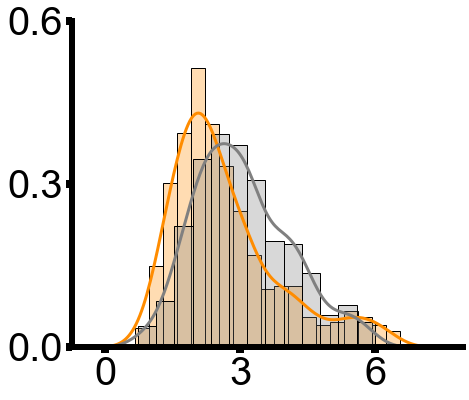

In [458]:
# similarity in occupancies
from scipy.stats import ks_2samp
obs_agg_dists = dists[:, :, 10:17, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
obs_non_dists = dists[:, :, 10:17, 17:]

# define distributions
distb1 = obs_agg_dists.flatten()
distb1 = distb1[~np.isnan(distb1)]
distb2 = obs_non_dists.flatten()
distb2 = distb2[~np.isnan(distb2)]

# Plot KDEs
fig, ax = plt.subplots(figsize=(7, 6))
sns.histplot(distb1, ax=ax, stat='density', color='darkorange', kde=False, alpha=0.3)
sns.kdeplot(distb1, ax=ax, color='darkorange', lw=3)
sns.histplot(distb2, ax=ax, stat='density', color='gray', kde=False, alpha=0.3)
sns.kdeplot(distb2, ax=ax, color='gray', lw=3)
sns.despine()
plt.ylabel('')
plt.yticks([0, 0.3, 0.6], fontfamily='Arial', fontsize=40)
plt.xticks([0, 3, 6], fontfamily='Arial', fontsize=40)

ks_statistic, p_value = ks_2samp(distb1, distb2)
print(ks_statistic)
print(p_value)


# plt.savefig('.\\figures\\JS_divergence_distb_persistence.svg', dpi=300)

### Mapping transitions

In [273]:
def map_cluster_transitions(animals, full_data, clusters, beh='agg'):
    
    if beh=='agg' or beh=='obs':
        transition_matrices = np.zeros((len(clusters), len(clusters), 27, len(animals)))    
    else:
        transition_matrices = np.zeros((len(clusters), len(clusters), 3, len(animals)))
    
    for a, animal in enumerate(animals):
        
        sessions2map = list(unsupervised_data_full.keys())
        
        if beh == 'agg':
            sessions2map = [x for x in sessions2map if animal in x if 'balbc' in x or '_mCD1_' in x]
        elif beh == 'obs':
            sessions2map = [x for x in sessions2map if animal in x if 'obs' in x or '_OBSmCD1_' in x]
        else:
            sessions2map = [x for x in sessions2map if animal in x if 'toyCD1' in x]
            
        for s, session in enumerate(sessions2map):
            
            vec = full_data[session]['unsupervised labels'].values.astype(int)
            for i in range(len(vec) - 1):
                if vec[i] != vec[i+1]:  # Exclude same-number transitions
                    transition_matrices[vec[i]-1][vec[i+1]-1, s, a] += 1

    row_sums = np.nansum(transition_matrices, axis=1, keepdims=True)
    normalized_transition_matrices = transition_matrices / row_sums
    
    return normalized_transition_matrices

agg_transitions = map_cluster_transitions(agg_animals, full_data, clusters, beh='agg')
obs_transitions = map_cluster_transitions(obs_animals, full_data, clusters, beh='obs')
non_transitions = map_cluster_transitions(non_animals, full_data, clusters, beh='toy')

C:\Users\Jorge\AppData\Local\Temp\ipykernel_60144\420646353.py:27: RuntimeWarning: invalid value encountered in divide
  normalized_transition_matrices = transition_matrices / row_sums


C:\Users\Jorge\AppData\Local\Temp\ipykernel_60144\3598786476.py:32: RuntimeWarning: Mean of empty slice
  avg_normalized_non_transitions = np.nanmean(np.nanmean(non_transitions, axis=2), axis=2)


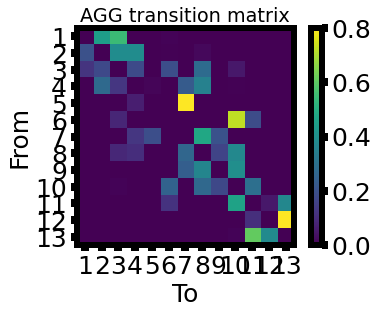

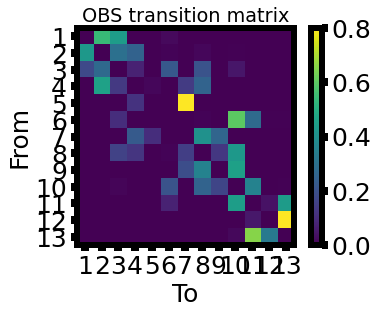

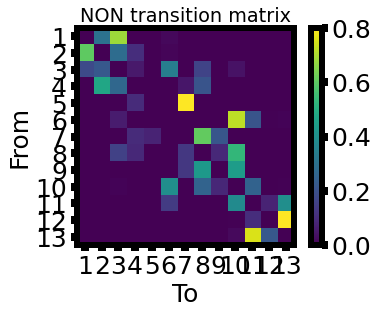

In [274]:
# Plot group-wise transition matrices for hard fight / group
sns.set_context(rc={'lines.linewidth': 2.5,
                    'axes.labelsize': 25,
                    'axes.titlesize': 19.200000000000003,
                    'font.size': 25,
                    'xtick.major.width': 8,
                    'ytick.major.width': 8,
                    'xtick.major.size':6,
                    'ytick.major.size':6,
                    'axes.linewidth':6})

avg_normalized_agg_transitions = np.nanmean(np.nanmean(agg_transitions, axis=2), axis=2)
plt.figure()
plt.title('AGG transition matrix')
plt.imshow(avg_normalized_agg_transitions, vmin=0, vmax=0.8)
plt.xticks(np.arange(n_clusters), np.arange(1,n_clusters+1))
plt.yticks(np.arange(n_clusters), np.arange(1,n_clusters+1))
plt.ylabel('From')
plt.xlabel('To')
plt.colorbar()

avg_normalized_obs_transitions = np.nanmean(np.nanmean(obs_transitions, axis=2), axis=2)
plt.figure()
plt.title('OBS transition matrix')
plt.imshow(avg_normalized_obs_transitions, vmin=0, vmax=0.8)
plt.xticks(np.arange(n_clusters), np.arange(1,n_clusters+1))
plt.yticks(np.arange(n_clusters), np.arange(1,n_clusters+1))
plt.ylabel('From')
plt.xlabel('To')
plt.colorbar()

avg_normalized_non_transitions = np.nanmean(np.nanmean(non_transitions, axis=2), axis=2)
plt.figure()
plt.title('NON transition matrix')
plt.imshow(avg_normalized_non_transitions, vmin=0, vmax=0.8)
plt.xticks(np.arange(n_clusters), np.arange(1,n_clusters+1))
plt.yticks(np.arange(n_clusters), np.arange(1,n_clusters+1))
plt.ylabel('From')
plt.xlabel('To')
plt.colorbar()

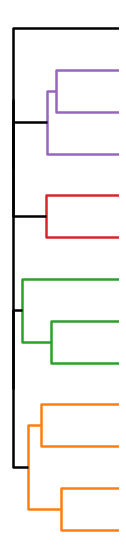

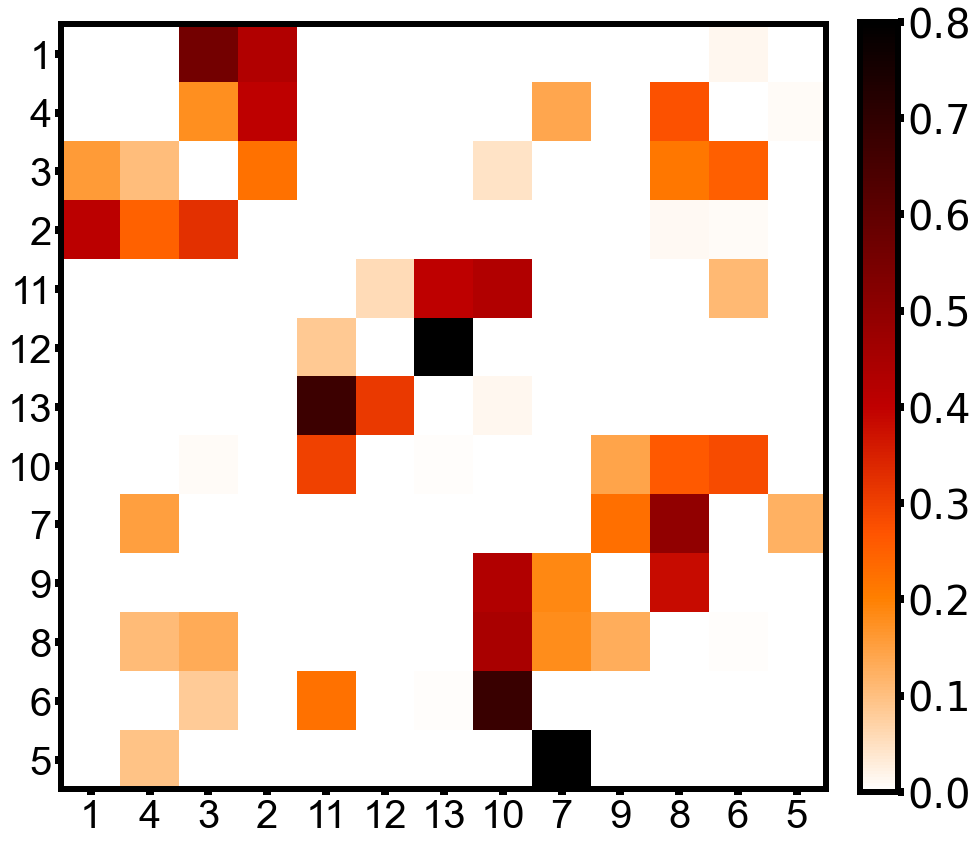

In [275]:
# global matrix and dendrogram
avg_normalized_transitions = np.concatenate([avg_normalized_agg_transitions.reshape((13, 13, 1)), avg_normalized_obs_transitions.reshape((13, 13, 1)), avg_normalized_non_transitions.reshape((13, 13, 1))], axis=2)
matrix = np.nanmean(avg_normalized_transitions, axis=2)

# build dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(matrix, metric='jensenshannon', method='complete', optimal_ordering=True)
plt.figure(figsize=(2, 10))
dendro_dict = dendrogram(Z, color_threshold=0.8, above_threshold_color='black', orientation='left')
leaf_indices = dendro_dict['leaves']
# plt.xticks(np.linspace(5, 125, 13), np.array(leaf_indices)+1)
sns.despine(left=True, bottom=True)
plt.yticks([])
plt.xticks([])
# plt.savefig('//Volumes/Storage/figures/svgs/dendrogram.svg', dpi=600)

# build matrix with hierarchical clustering
plt.figure(figsize=(15, 15))
plt.imshow(matrix[leaf_indices, :][:, leaf_indices], vmin=0, vmax=0.8, cmap='gist_heat_r')
plt.xticks(np.arange(n_clusters), np.arange(1,n_clusters+1)[leaf_indices])
plt.yticks(np.arange(n_clusters), np.arange(1,n_clusters+1)[leaf_indices])
plt.xticks(fontsize=40, fontname='Arial')
plt.yticks(fontsize=40, fontname='Arial')
# plt.ylabel('From')
# plt.xlabel('To')
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=40)
# plt.savefig('//Volumes/Storage/figures/svgs/transition_matrix_full.svg', dpi=600, bbox_inches='tight')

100%|██████████| 13/13 [01:28<00:00,  6.79s/it]


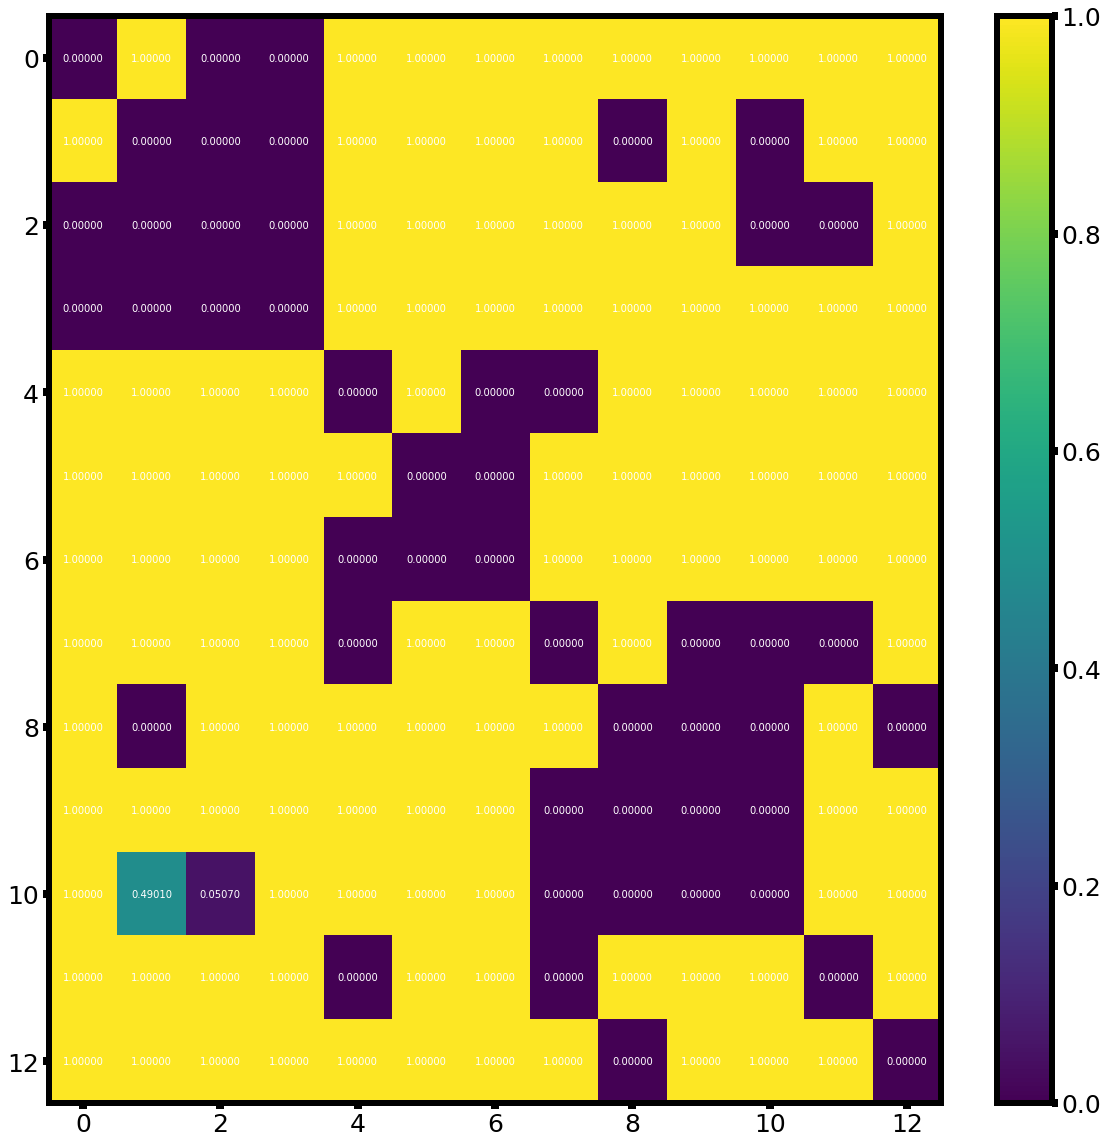

In [283]:
# run permutation testing for the global matrix
from tqdm import tqdm
non_transitions_holder = np.zeros((13, 13, 27, 6))
non_transitions_holder[:] = np.nan
non_transitions_holder[:, :, -3:, :] = non_transitions
test = np.concatenate([agg_transitions, obs_transitions, non_transitions_holder], axis=3)
n_perms = 10000

# Create a mask for the diagonal elements
mask = np.ones((13, 13), dtype=bool)
np.fill_diagonal(mask, 0)

# Initialize an array to hold the p-values
p_values = np.zeros((13, 13))

# Flatten the data and create a copy for permutation
flattened_data = test[mask].flatten()

# Perform the permutation test separately for each element
for i in tqdm(range(13)):
    for j in range(13):
        if mask[i, j]:
            # Get the observed values for this element
            observed_values = test[i, j, :]
            observed_values = observed_values[np.isnan(observed_values)==False]

            # Initialize an array to hold the permuted means
            permuted_means = np.zeros(n_perms)

            # Perform the permutation test
            for k in range(n_perms):
                permuted_values = np.random.choice(flattened_data.copy(), size=observed_values.shape, replace=True)
                permuted_means[k] = np.nanmean(permuted_values)

            # Compute the p-value
            p_values[i, j] = np.nanmean(permuted_means >= np.nanmean(observed_values))
            
from statsmodels.stats.multitest import multipletests

# Flatten the p-values array
p_values_flat = p_values.flatten()

# Apply the Bonferroni correction
corrected_p_values_flat = multipletests(p_values_flat, method='bonferroni')[1]

# Reshape the corrected p-values back into the original shape
corrected_p_values = corrected_p_values_flat.reshape(p_values.shape)

### plot p_value heatmap

# Extract the 8x8 grid
grid = corrected_p_values[leaf_indices, :][:, leaf_indices]

# Create the plot
plt.figure(figsize=(20, 20))
plt.imshow(grid, cmap='viridis', aspect='auto')

# Add the values as text
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        plt.text(j, i, f'{grid[i, j]:.5f}', ha='center', va='center', color='white', fontsize=10)

# Add colorbar
plt.colorbar()

# Display the plot
plt.show()

In [296]:
# Initialize the dictionary
from itertools import product
p_value_dict = {}

# Create the pairwise combinations for a 13x13 grid
conditions = range(13)
pairwise_combinations = list(product(conditions, repeat=2))

# Map each p-value to its corresponding pairwise combination
for idx, (i, j) in enumerate(pairwise_combinations):
    if i != j:
        p_value_dict[(i, j)] = p_values_flat[idx]

# Print the dictionary
print("Dictionary mapping each p-value to each pairwise combination:")
for key, value in p_value_dict.items():
    print(f"{key}: {value:.3f}")

# Create a DataFrame from the dictionary
data = {
    'Combination': [f"Permutation test: ({i}, {j})" for i, j in p_value_dict.keys() if i != j],
    'P-Value': [f"p = {value:.3f}" for value in p_value_dict.values()]
}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('p_values_mapping.xlsx', index=False)

Dictionary mapping each p-value to each pairwise combination:
(0, 1): 0.000
(0, 2): 0.000
(0, 3): 1.000
(0, 4): 1.000
(0, 5): 1.000
(0, 6): 1.000
(0, 7): 1.000
(0, 8): 1.000
(0, 9): 1.000
(0, 10): 1.000
(0, 11): 1.000
(0, 12): 1.000
(1, 0): 0.000
(1, 2): 0.000
(1, 3): 0.000
(1, 4): 1.000
(1, 5): 1.000
(1, 6): 1.000
(1, 7): 1.000
(1, 8): 1.000
(1, 9): 1.000
(1, 10): 1.000
(1, 11): 1.000
(1, 12): 1.000
(2, 0): 0.000
(2, 1): 0.000
(2, 3): 0.000
(2, 4): 1.000
(2, 5): 0.000
(2, 6): 1.000
(2, 7): 0.000
(2, 8): 1.000
(2, 9): 1.000
(2, 10): 1.000
(2, 11): 1.000
(2, 12): 1.000
(3, 0): 1.000
(3, 1): 0.000
(3, 2): 0.000
(3, 4): 1.000
(3, 5): 1.000
(3, 6): 0.000
(3, 7): 0.000
(3, 8): 1.000
(3, 9): 1.000
(3, 10): 1.000
(3, 11): 1.000
(3, 12): 1.000
(4, 0): 1.000
(4, 1): 1.000
(4, 2): 1.000
(4, 3): 0.496
(4, 5): 1.000
(4, 6): 0.000
(4, 7): 1.000
(4, 8): 1.000
(4, 9): 1.000
(4, 10): 1.000
(4, 11): 1.000
(4, 12): 1.000
(5, 0): 1.000
(5, 1): 1.000
(5, 2): 0.175
(5, 3): 1.000
(5, 4): 1.000
(5, 6): 1.000

C:\Users\Jorge\AppData\Local\Temp\ipykernel_60144\2059740353.py:27: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel('p_values_mapping.xlsx', index=False)


In [381]:
# group transition matrix differences

import matplotlib.colors as colors
indices = [0, 3, 2, 1, 9, 6, 8, 7, 5] # include subclusters 1, 3 and 4 (largely social and aggression)
agg_transitions_2_map = agg_transitions[np.ix_(indices, indices, range(-3, 0), range(agg_transitions.shape[3]))]
obs_transitions_2_map = obs_transitions[np.ix_(indices, indices, range(-3, 0), range(obs_transitions.shape[3]))]
non_transitions_2_map = non_transitions[np.ix_(indices, indices, range(non_transitions.shape[2]), range(non_transitions.shape[3]))]

agg_transitions_2_map = np.where(np.isnan(agg_transitions_2_map), 0, agg_transitions_2_map)
obs_transitions_2_map = np.where(np.isnan(obs_transitions_2_map), 0, obs_transitions_2_map)
non_transitions_2_map = np.where(np.isnan(non_transitions_2_map), 0, non_transitions_2_map)

all_transitions = [agg_transitions_2_map, obs_transitions_2_map, non_transitions_2_map]
all_transitions = np.concatenate(all_transitions, axis=3)
n_animals=23
all_dists = np.zeros((3, n_animals, n_animals))
all_dists[:] = np.nan

for animal in np.arange(all_transitions.shape[-1]):
    sample = all_transitions[:, :, :, animal]
    for second_animal in np.arange(all_transitions.shape[-1]):
        if second_animal==animal:
            continue
        second_sample = all_transitions[:, :, :, second_animal]
        for session in np.arange(3):
            all_dists[session, animal, second_animal] = jensenshannon(sample[:, :, session].flatten(), second_sample[:, :, session].flatten())

In [387]:
all_dists = np.zeros((3, 3, n_animals, n_animals))
all_dists[:] = np.nan
for animal in np.arange(all_transitions.shape[-1]):
    for session1 in np.arange(3):
        sample = all_transitions[:, :, session1, animal]
        for second_animal in np.arange(all_transitions.shape[-1]):
            if second_animal==animal:
                continue
            for session2 in np.arange(3):
                second_sample = all_transitions[:, :, session2, second_animal]
                all_dists[session1, session2, animal, second_animal] = jensenshannon(sample.flatten(), second_sample.flatten())

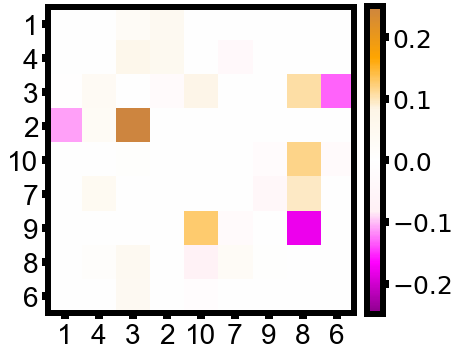

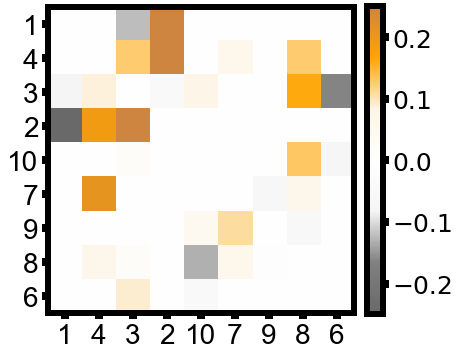

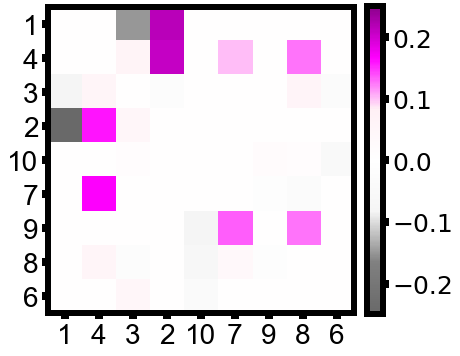

In [369]:
aggro_non = all_dists[:, np.arange(10), 17:]
aggro_non = np.nanmedian(aggro_non, axis=0)

obs_non = all_dists[:, np.arange(10, 17), 17:]
obs_non = np.nanmedian(obs_non, axis=0)

obs_aggro = all_dists[:, np.arange(10, 17), :10]
obs_aggro = np.nanmedian(obs_aggro, axis=0)

cmap_magenta = colors.LinearSegmentedColormap.from_list("", ["white", "lavenderblush", "magenta", "darkmagenta"])
cmap_orange = colors.LinearSegmentedColormap.from_list("", ["white", "oldlace", "orange","peru"])
cmap_gray = colors.LinearSegmentedColormap.from_list("", ["white", "whitesmoke", "gray", "dimgray"])

agg_minus_obs_cmap = colors.LinearSegmentedColormap.from_list("", ['darkmagenta', 'magenta', 'lavenderblush', 'white', 'oldlace', 'orange', 'peru'])
agg_minus_non_cmap = colors.LinearSegmentedColormap.from_list("", ['dimgray', 'gray', 'whitesmoke', 'white', 'oldlace', 'orange', 'peru'])
obs_minus_non_cmap = colors.LinearSegmentedColormap.from_list("", ['dimgray', 'gray', 'whitesmoke', 'white', 'lavenderblush', 'magenta', 'darkmagenta'])

# Compute the difference matrices
diff_agg_obs = np.nanmedian(np.nanmedian(agg_transitions_2_map, axis=2), axis=2) - np.nanmedian(np.nanmedian(obs_transitions_2_map, axis=2), axis=2)
diff_agg_non = np.nanmedian(np.nanmedian(agg_transitions_2_map, axis=2), axis=2) - np.nanmedian(np.nanmedian(non_transitions_2_map, axis=2), axis=2)
diff_obs_non = np.nanmedian(np.nanmedian(obs_transitions_2_map, axis=2), axis=2) - np.nanmedian(np.nanmedian(non_transitions_2_map, axis=2), axis=2)

# Create heatmaps for the difference matrices

fs=28
vmin=-0.25
vmax=0.25
norm = colors.Normalize(vmin=vmin, vmax=vmax)
new_leaf_indices = [0, 3, 2, 1, 8, 5, 7, 6, 4]
real_clusters = [1, 4, 3, 2, 10, 7, 9, 8, 6]

plt.figure(figsize=(6, 6))
plt.imshow(diff_agg_obs, cmap=agg_minus_obs_cmap, norm=norm)
# plt.title('Difference: Agg - Obs')
plt.xticks(np.arange(len(real_clusters)), real_clusters, fontsize=fs, fontfamily='Arial');
plt.yticks(np.arange(len(real_clusters)), real_clusters, fontsize=fs, fontfamily='Arial');
plt.colorbar(fraction=0.046, pad=0.04)
# plt.savefig('./figures/agg_minus_obs.svg', dpi=600)

plt.figure(figsize=(6, 6))
plt.imshow(diff_agg_non, cmap=agg_minus_non_cmap, norm=norm)
# plt.title('Difference: Agg - Non')
plt.xticks(np.arange(len(real_clusters)), real_clusters, fontsize=fs, fontfamily='Arial');
plt.yticks(np.arange(len(real_clusters)), real_clusters, fontsize=fs, fontfamily='Arial');
plt.colorbar(fraction=0.046, pad=0.04)
# plt.savefig('./figures/agg_minus_non.svg', dpi=600)

plt.figure(figsize=(6, 6))
plt.imshow(diff_obs_non, cmap=obs_minus_non_cmap, norm=norm)
# plt.title('Difference: Obs - Non')
plt.xticks(np.arange(len(real_clusters)), real_clusters, fontsize=fs, fontfamily='Arial');
plt.yticks(np.arange(len(real_clusters)), real_clusters, fontsize=fs, fontfamily='Arial');
plt.colorbar(fraction=0.046, pad=0.04)
# plt.savefig('./figures/obs_minus_non.svg', dpi=600)

2.2870594307278225e-14
0.25873015873015875


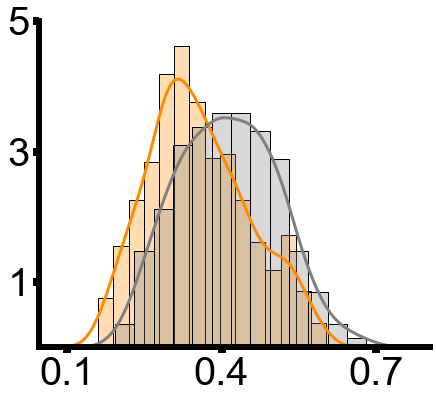

In [388]:
# compare similarities in transitions between groups
from scipy.stats import ks_2samp
obs_agg_dists = all_dists[:, :, np.arange(10, 17), :10]
obs_non_dists = all_dists[:, :, np.arange(10, 17), 17:]

# define distributions
distb1 = obs_agg_dists.flatten()
distb1 = distb1[~np.isnan(distb1)]
distb2 = obs_non_dists.flatten()
distb2 = distb2[~np.isnan(distb2)]

# Plot KDEs
fig, ax = plt.subplots(figsize=(7, 6))
sns.histplot(distb1, ax=ax, stat='density', color='darkorange', kde=False, alpha=0.3)
sns.kdeplot(distb1, ax=ax, color='darkorange', lw=3)
sns.histplot(distb2, ax=ax, stat='density', color='gray', kde=False, alpha=0.3)
sns.kdeplot(distb2, ax=ax, color='gray', lw=3)
sns.despine()
plt.ylabel('')
plt.yticks([1, 3, 5], fontfamily='Arial', fontsize=40)
plt.xticks([0.1, 0.4, 0.7], fontfamily='Arial', fontsize=40)

ks_statistic, p_value = ks_2samp(distb1, distb2)
print(p_value)
print(ks_statistic)
# plt.savefig('./figures/transition_distances_distbs.svg')

In [479]:
# decoder using transitions

# SVM classification using cluster persistences
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import shuffle

# Define the data

agg_X = agg_transitions_2_map.reshape(81, 30)
obs_X = obs_transitions_2_map.reshape(81, 21)
non_X = non_transitions_2_map.reshape(81, 18)

X = np.concatenate([agg_X, obs_X, non_X], axis=1).T
y = np.array([1]*agg_X.shape[1] + [2]*obs_X.shape[1] + [3]*non_X.shape[1]).reshape(1, -1).T

# Initialize leave-one-out cross-validator
loo = LeaveOneOut()

# Initialize model
model = SVC()

# Store predictions
predictions = []

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X_train, y_train.ravel())
    
    # Predict the test sample
    y_pred = model.predict(X_test)
    
    # Store the prediction
    predictions.append(y_pred[0])

# Evaluate the model
print('Evaluation on the test set:')
test_accuracy = accuracy_score(y, predictions)
test_f1 = f1_score(y, predictions, average='weighted')
print(f'Accuracy: {test_accuracy:.2f}')
print(f'F1 Score: {test_f1:.2f}')

# Create null distribution
num_shuffles = 1000
null_accuracies = []
null_f1s = []
from tqdm import tqdm
for _ in tqdm(range(num_shuffles)):
    y_shuffled = shuffle(y)
    null_predictions = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y_shuffled[train_index], y_shuffled[test_index]
        
        # Train the model
        model.fit(X_train, y_train.ravel())
        
        # Predict the test sample
        y_pred = model.predict(X_test)
        
        # Store the prediction
        null_predictions.append(y_pred[0])
    
    # Evaluate the model on shuffled data
    null_accuracies.append(accuracy_score(y, null_predictions))
    null_f1s.append(f1_score(y, null_predictions, average='weighted'))

Evaluation on the test set:
Accuracy: 0.57
F1 Score: 0.52


100%|██████████| 1000/1000 [01:30<00:00, 11.10it/s]


In [482]:
p_value_accuracy = np.mean(np.array(null_accuracies) >= test_accuracy)
print(f'p-value for accuracy: {p_value_accuracy:.3f}')
p_value_f1 = np.mean(np.array(null_f1s) >= test_f1)
print(f'p-value for F1 score: {p_value_f1:.5f}')

p-value for accuracy: 0.001
p-value for F1 score: 0.00000


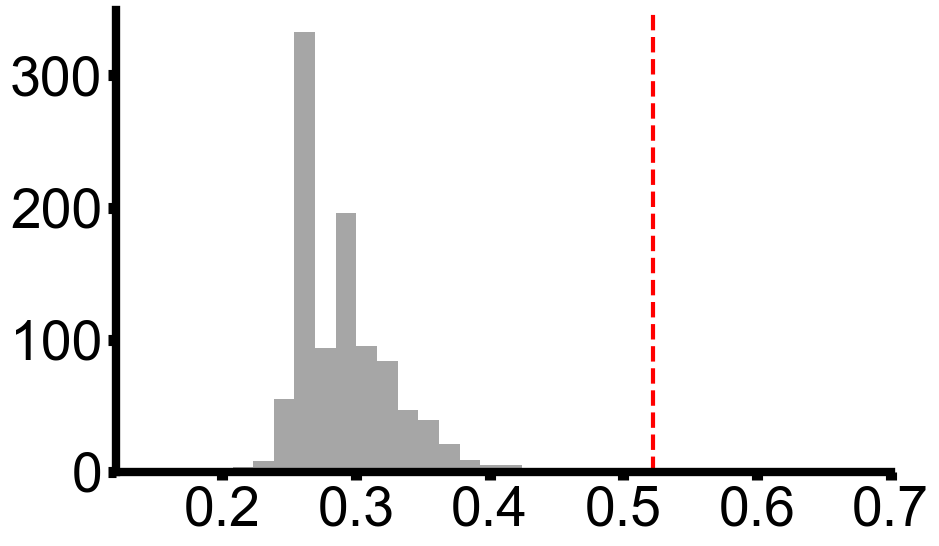

In [481]:
# Plot the null distribution and test F1 score
plt.figure(figsize=(10, 6))
plt.hist(null_f1s, bins=20, alpha=0.7, label='Null Distribution', color='gray')
plt.axvline(test_f1, color='red', linestyle='dashed', linewidth=3, label='Test Accuracy')
plt.xlim(0.12, 0.7)
plt.xticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7], fontsize=40, fontfamily='Arial')
plt.yticks(fontsize=40, fontfamily='Arial')
sns.despine()
plt.savefig('./figures/transition_LOO_F1_score.svg')


### Features

In [23]:
new_feat_descs = ['intruder centroid speed', 'intruder centroid lagged speed', 'intruder pose', 'intruder head speed', 'intruder head lagged spead', 'intruder body length',
'intruder head-to-resident tailbase', 'intruder orientation to resident', 'IoU', 'inter-animal distance', 'inter-animal lagged distance', 'inter-animal speed', 'inter-animal lagged speed', 
'resident centroid speed', 'resident centroid lagged speed', 'resident pose', 'resident head speed', 'resident head lagged spead', 'resident body length', 'resident head-to-intruder head', 'resident head-to-intruder head lagged',
'resident head-to-intruder tailbase', 'resident orientation to intruder']

def map_feature_data(animals, features, feats_list, beh='agg'):
    
    feats_across_animals = np.zeros((len(feats_list), 27, len(animals)))
    feats_across_animals[:] = np.nan
    
    for a, animal in enumerate(animals):
        
        sessions2map = list(features.keys())
        
        if beh == 'agg':
            sessions2map = [x for x in sessions2map if animal in x if '_balbc_' in x or '_mCD1_' in x]
        elif beh == 'obs':
            sessions2map = [x for x in sessions2map if animal in x if '_obs_' in x or '_OBSmCD1_' in x]
        else:
            sessions2map = [x for x in sessions2map if animal in x if 'toy' in x or 'toyCD1' in x]
            
        for s, session in enumerate(sessions2map):
            sample = features[session]
            for f, feat in enumerate(feats_list):
                feats_across_animals[f, s, a] = np.nanmean(sample[feat].values)

    return feats_across_animals

agg_feats_across_animals = map_feature_data(agg_animals, features, feats_list, beh='agg')
obs_feats_across_animals = map_feature_data(obs_animals, features, feats_list, beh='obs')
non_feats_across_animals = map_feature_data(non_animals, features, feats_list, beh='non')


intruder centroid speed
F = 1.094467, p = 0.353945
###
###
intruder centroid lagged speed
F = 1.093771, p = 0.354167
###
###
intruder pose
H = 4.071946, p = 0.130553
###
###
intruder head speed
F = 1.061808, p = 0.364535
###
###
intruder head lagged spead
F = 1.060754, p = 0.364882
###
###
intruder body length
H = 1.866356, p = 0.393302
###
###
intruder head-to-resident tailbase
H = 7.649689, p = 0.021822
AGG vs NON; U = 5.000000, p = 0.009491
AGG vs OBS; U = 31.000000, p = 0.493076
OBS vs NON; U = 7.000000, p = 0.051282
###
###
intruder orientation to resident
F = 5.560739, p = 0.012014
AGG vs NON; t = 3.619067, p = 0.005582
AGG vs OBS; t = 1.960943, p = 0.068725
OBS vs NON; t = 1.054645, p = 0.209468
###
###
IoU
F = 8.304569, p = 0.002368
AGG vs NON; t = 3.983126, p = 0.001360
AGG vs OBS; t = 1.433286, p = 0.057430
OBS vs NON; t = 3.225148, p = 0.004042
###
###
inter-animal distance
F = 8.165357, p = 0.002556
AGG vs NON; t = -4.009824, p = 0.001291
AGG vs OBS; t = -1.497838, p = 0.05

C:\Users\Jorge\AppData\Local\Temp\ipykernel_60144\777570634.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4, 3))


resident head-to-intruder tailbase
F = 9.909086, p = 0.001022
AGG vs NON; t = -4.262371, p = 0.000789
AGG vs OBS; t = -1.983195, p = 0.021988
OBS vs NON; t = -2.812913, p = 0.008440
###
###
resident orientation to intruder
F = 0.760335, p = 0.480554
###
###


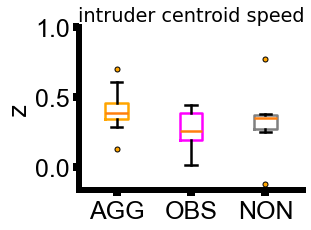

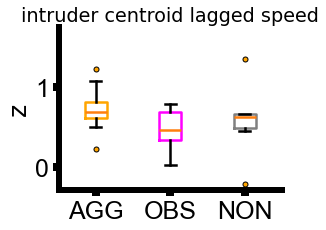

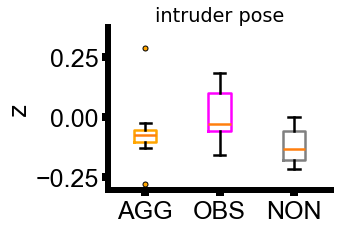

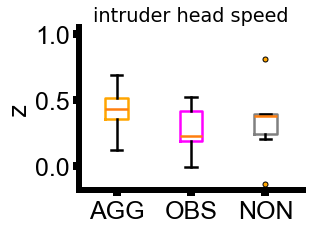

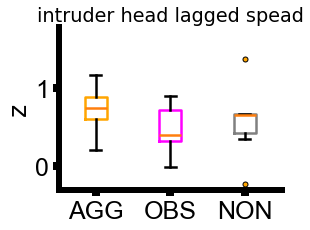

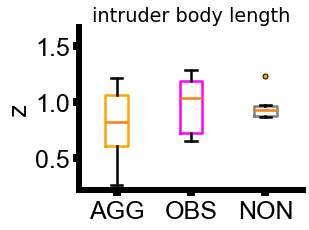

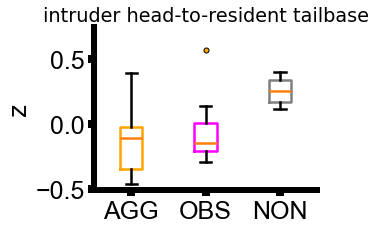

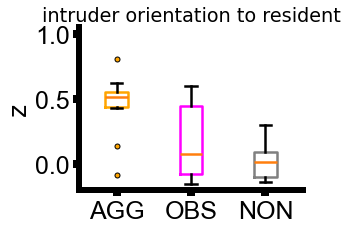

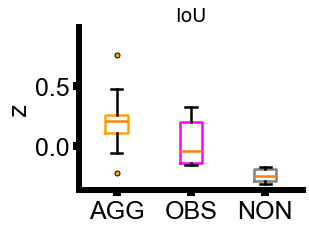

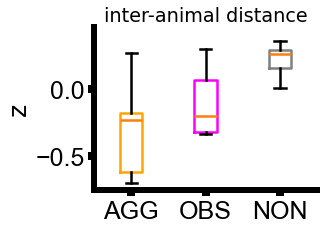

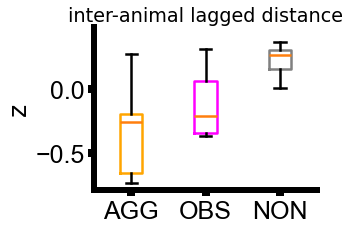

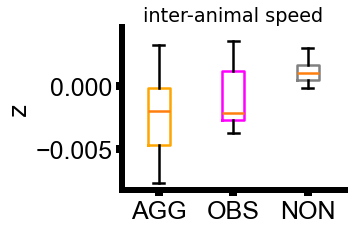

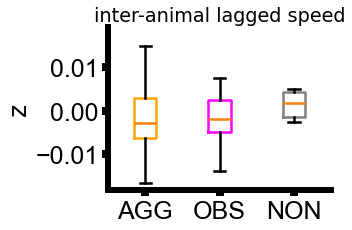

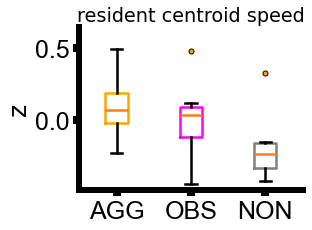

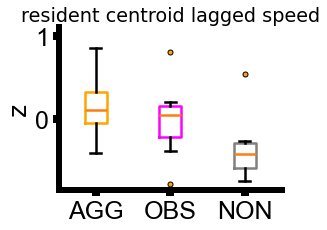

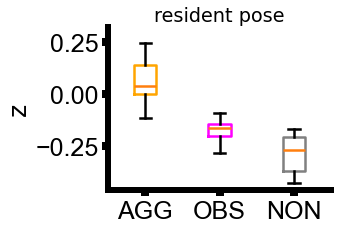

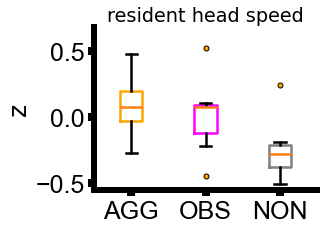

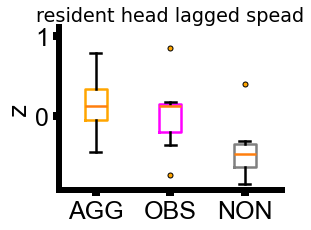

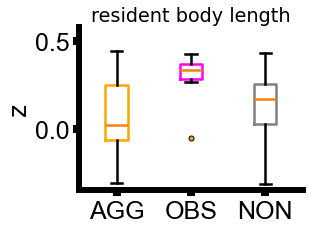

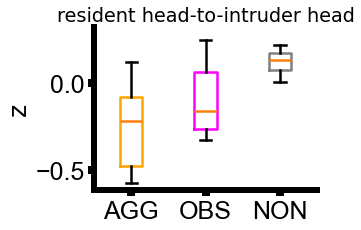

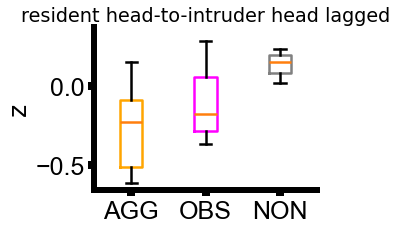

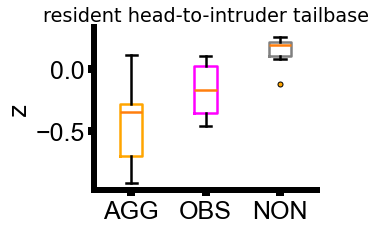

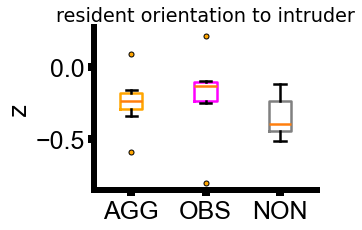

In [454]:
boxprops = {'whiskerprops': dict(linewidth=2.5), 
            'capprops' : dict(linewidth=2.5),
            'medianprops' : dict(linewidth=2.5),
            'flierprops' : dict(markerfacecolor='orange', marker='o', markersize=5, linestyle='none', linewidth=2.5),
            'widths': 0.3
}

for i in np.arange(agg_feats_across_animals.shape[0]):

    agg_feat = np.nanmean(agg_feats_across_animals[i, -3:, :], axis=0)
    obs_feat = np.nanmean(obs_feats_across_animals[i, -3:, :], axis=0)
    non_feat = np.nanmean(non_feats_across_animals[i, :3, :], axis=0)

    # Stats
    print(new_feat_descs[i])
    run_cluster_stats([agg_feat, obs_feat, non_feat])
    print('###')

    plt.figure(figsize=(4, 3))
    plt.title(new_feat_descs[i])
    plt.boxplot(agg_feat, positions=[0], boxprops=dict(color='orange', linewidth=2.5), **boxprops)
    plt.boxplot(obs_feat, positions=[1], boxprops=dict(color='magenta', linewidth=2.5), **boxprops)
    plt.boxplot(non_feat, positions=[2], boxprops=dict(color='gray', linewidth=2.5), **boxprops)
    plt.xticks([0, 1, 2], ['AGG', 'OBS', 'NON'], fontsize=25, fontfamily='Arial')
    plt.ylim(top=max([np.nanmax(agg_feat), np.nanmax(obs_feat), np.nanmax(non_feat)]) *1.3)
    plt.yticks(fontsize=25, fontfamily='Arial')
    plt.ylabel('z')
    sns.despine()
    # plt.savefig('.\\figures\\' + new_feat_descs[i] + '.svg', dpi=300, bbox_inches='tight')

In [129]:
# clustering of clusters by features

new_feat_descs = ['intruder centroid speed', 'intruder centroid lagged speed', 'intruder pose', 'intruder head speed', 'intruder head lagged spead', 'intruder body length',
'intruder head-to-resident tailbase', 'intruder orientation to resident', 'IoU', 'inter-animal distance', 'inter-animal lagged distance', 'inter-animal speed', 'inter-animal lagged speed', 
'resident centroid speed', 'resident centroid lagged speed', 'resident pose', 'resident head speed', 'resident head lagged spead', 'resident body length', 'resident head-to-intruder head', 'resident head-to-intruder head lagged',
'resident head-to-intruder tailbase', 'resident orientation to intruder']

def map_feature_data_by_cluster(animals, features, feats_list, beh='agg'):
    
    feats_across_animals = np.zeros((13, len(feats_list), 27, len(animals)))
    feats_across_animals[:] = np.nan
    
    for a, animal in enumerate(animals):
        
        sessions2map = list(features.keys())
        
        if beh == 'agg':
            sessions2map = [x for x in sessions2map if animal in x if '_balbc_' in x or '_mCD1_' in x]
        elif beh == 'obs':
            sessions2map = [x for x in sessions2map if animal in x if '_obs_' in x or '_OBSmCD1_' in x]
        else:
            sessions2map = [x for x in sessions2map if animal in x if 'toy' in x or 'toyCD1' in x]
            
        for s, session in enumerate(sessions2map):
            sample = features[session]
            for f, feat in enumerate(feats_list):
                for cluster in np.arange(1, 14):
                    feats_across_animals[cluster-1, f, s, a] = np.nanmean(sample[full_data[session]['unsupervised labels'] == cluster][feat].values)

    return feats_across_animals

agg_feats_by_cluster = map_feature_data_by_cluster(agg_animals, features, feats_list3, beh='agg')
obs_feats_by_cluster = map_feature_data_by_cluster(obs_animals, features, feats_list3, beh='obs')
non_feats_by_cluster = map_feature_data_by_cluster(non_animals, features, feats_list3, beh='non')
feats_by_cluster = np.concatenate([agg_feats_by_cluster, obs_feats_by_cluster], axis=-1)


C:\Users\Jorge\AppData\Local\Temp\ipykernel_60144\593946549.py:28: RuntimeWarning: Mean of empty slice
  feats_across_animals[cluster-1, f, s, a] = np.nanmean(sample[full_data[session]['unsupervised labels'] == cluster][feat].values)


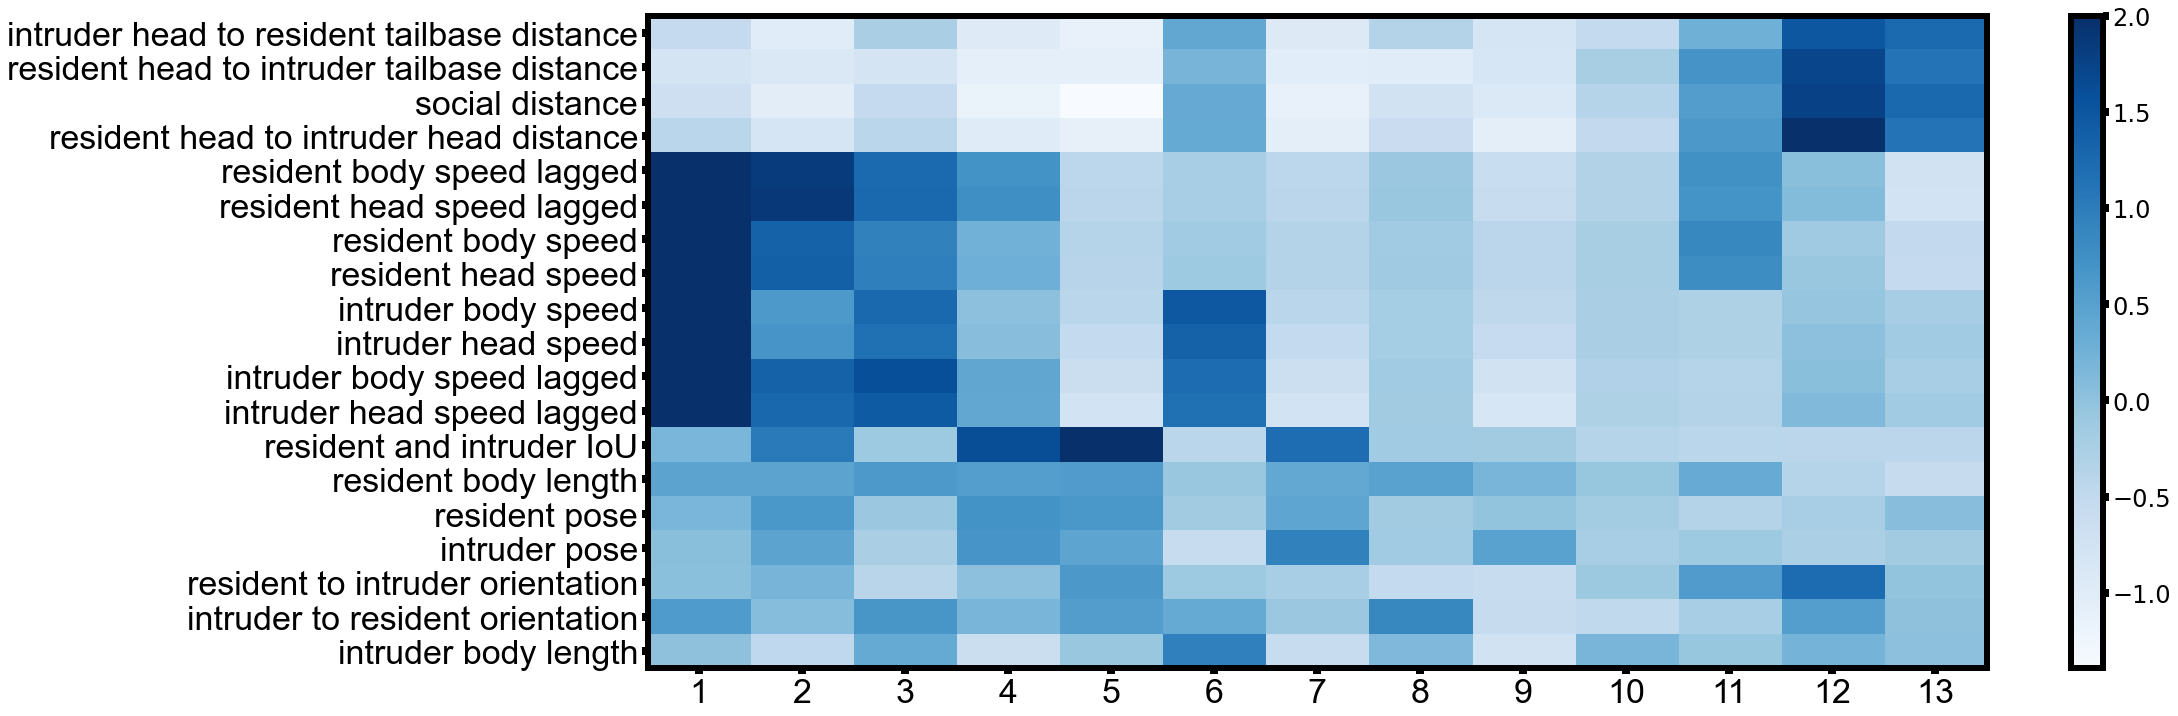

In [149]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

feats3_descriptions = ['social distance', 'resident head to intruder head distance',
                       'resident head to intruder tailbase distance', 'intruder head to resident tailbase distance',
                       'resident to intruder orientation', 'intruder to resident orientation', 'resident body speed', 
                       'intruder body speed', 'resident head speed', 'intruder head speed', 'resident body speed lagged',
                       'intruder body speed lagged', 'resident head speed lagged', 'intruder head speed lagged', 'resident and intruder IoU',
                       'resident pose', 'intruder pose', 'resident body length', 'intruder body length']

# Perform hierarchical clustering
mean_features_by_cluster = np.nanmean(feats_by_cluster, axis=(2,3))
Z = linkage(mean_features_by_cluster.T, method='ward')  # Transpose to cluster columns

# Get the order of the leaves (clusters)
leaf_order = leaves_list(Z)

# Reorder the columns of the data matrix
reordered_data = mean_features_by_cluster[:, leaf_order]
reordered_feats = np.asarray(feats3_descriptions)[leaf_order]

# Plot heatmap with reordered columns
plt.figure(figsize=(30, 12))
plt.imshow(reordered_data.T, cmap='Blues', vmax=2, aspect='auto')
plt.yticks(np.arange(19), reordered_feats, fontsize=34, fontfamily='Arial');
plt.xticks(np.arange(13), np.arange(1,14), fontsize=34, fontfamily='Arial');
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=24)
plt.savefig('.\\figures\\clustered_features.svg', dpi=300)

### Comparing embeddings

In [5]:
from scipy.ndimage import gaussian_filter
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from matplotlib import colors
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap

def open_sessions(path):
    with open(path, 'rb') as handle:
        feats = pickle.load(handle)
    return feats

def select_features(feats, feats_list):
    
    for feat_day in feats.keys():
        feats[feat_day] = feats[feat_day][feats_list]
        
    return feats

def map_density(X_embedded, bins=50, sigma=2.5, percentile=30, cm = 'nipy_spectral', watershed_line=True, wt=0):

    # Find local maxima as "seeds" for the watershed transform
    all_map_density, xe, ye = heatmap(X_embedded, bins=bins, sigma=sigma)
    density_cutoff = np.percentile(all_map_density, percentile)
    density_mask = all_map_density > density_cutoff
    local_maxes = peak_local_max(all_map_density, indices=False)
    local_maxes[np.logical_not(density_mask)] = False
    markers, n_peaks = scipy.ndimage.label(local_maxes)

    # Compute watershed transform
    
    labeled_map = watershed(-all_map_density, markers, watershed_line=False)
    labeled_map = labeled_map.astype('float64')
    
    labeled_map_viz = watershed(-all_map_density, markers, watershed_line=watershed_line)
    labeled_map_viz = labeled_map_viz.astype('float64')

    viz = all_map_density
    viz[labeled_map_viz==0]=wt
    plt.figure(figsize=(10,10))
    plt.imshow(all_map_density.T, cmap=cm,origin='lower')
    
    plt.axis('off')
    plt.show()
    
    ###
    
    plt.figure(figsize=(10,10))
    plt.imshow(labeled_map.T, cmap='rainbow',origin='lower')
    plt.axis('off')

    for i in np.unique(labeled_map.flatten()):
        x=np.mean(np.where(labeled_map==i)[0])
        y=np.mean(np.where(labeled_map==i)[1])
        plt.text(x,y,int(i),size=20)

    plt.show()
    
    return labeled_map, all_map_density, xe, ye, local_maxes

def heatmap(data, axlims=None, bins=100, normed=True, sigma=0.0):
    
    # Initial histogram
    heatmap, xedges, yedges = np.histogram2d(data[:,0], data[:, 1], bins=bins, range=axlims, normed=normed)
    
    # Convolve with Gaussian
    heatmap = gaussian_filter(heatmap, sigma=sigma)
    
    return heatmap, xedges, yedges

def embedding_labels(embeddings, labeled_map, xe, ye, bins=100):

    labels = {}

    map_shape=(bins,bins)
    xmin=min(xe)
    xmax=max(xe)
    ymin=min(ye)
    ymax=max(ye)

    for k, e in embeddings.items():
        
        def to_coords(xy):
            
            x = (xy[0] - xmin) / (xmax - xmin) * map_shape[0]
            y = (xy[1] - ymin) / (ymax - ymin) * map_shape[1]
            if x >= map_shape[0]:
                x = map_shape[0]-1
            if y >= map_shape[1]:
                y = map_shape[1]-1
            if x < 0:
                x=0
            if y < 0:
                y=0
            return int(x), int(y)

        labels[k] = np.array([labeled_map[to_coords(point)] for point in e])
        
    return labels


direct = 'E:\\data\\umap_model\\'
file = 'Feats3_100k_samples_UMAP_01mindist_50neighbors_embeddings.pickle'
file2 = 'Feats3_100k_samples_UMAP_01mindist_50neighbors_remainingEmbeddings.pickle'
data = open_sessions(direct + file)
data2join = open_sessions(direct + file2)
data = {**data, **data2join}

Generating embedding figs

C:\Users\Jorge\AppData\Local\Temp\ipykernel_13744\2690074813.py:27: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxes = peak_local_max(all_map_density, indices=False)


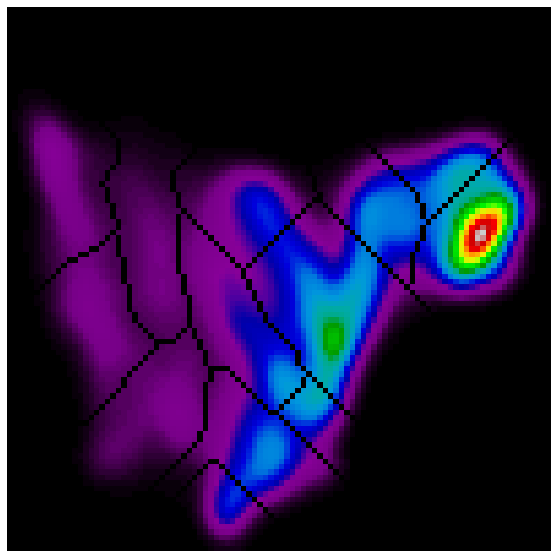

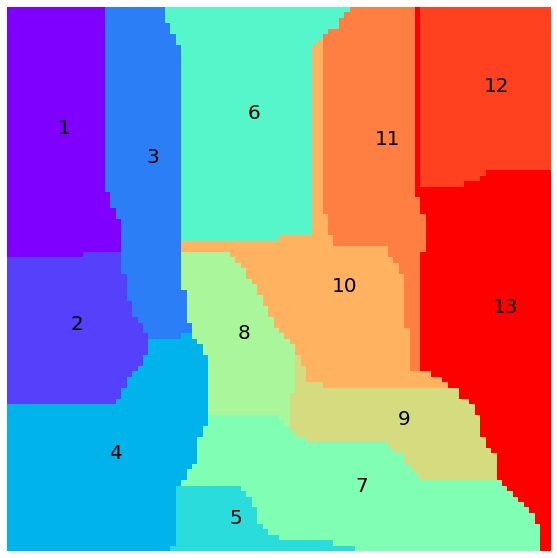

In [6]:
# concatenate all embeddings
final_embs = []
for key in data.keys():
    final_embs.append(data[key])
final_embs = np.row_stack(final_embs)

labeled_map, density, xe, ye, _ = map_density(final_embs, bins=100, percentile=73.8, sigma=2.1) 
labels = embedding_labels(data, labeled_map, xe, ye, bins=100)

# derive final label set
final_labels = []
for key in labels.keys():
    final_labels.append(labels[key])
final_labels = np.concatenate(final_labels)

C:\Users\Jorge\AppData\Local\Temp\ipykernel_13744\2690074813.py:27: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxes = peak_local_max(all_map_density, indices=False)


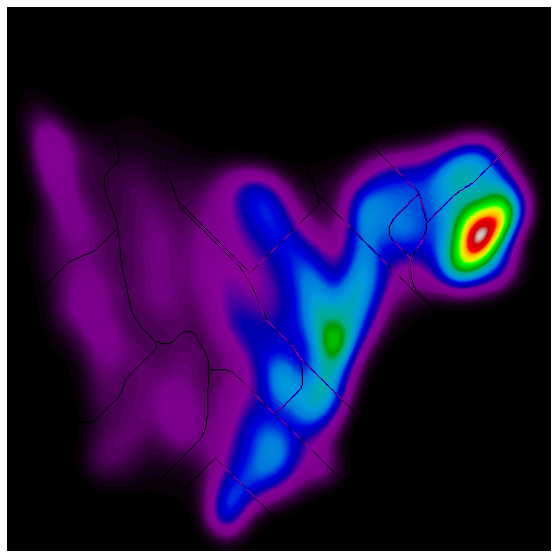

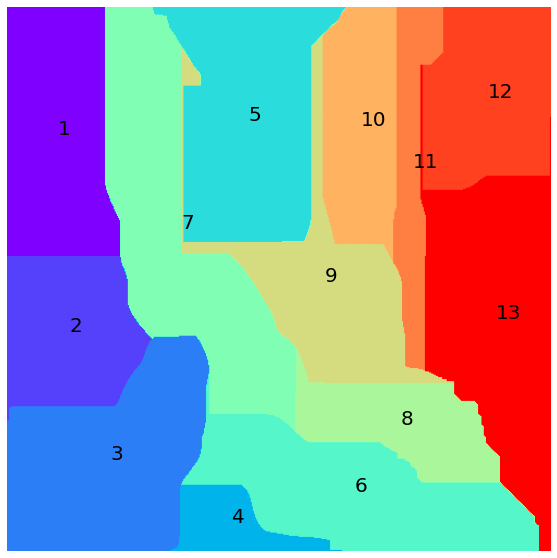

In [7]:
# concatenate all embeddings
final_embs = []
for key in data.keys():
    final_embs.append(data[key])
final_embs = np.row_stack(final_embs)

# run watershed on concatenated embeddings
labeled_map, density, xe, ye, _ = map_density(final_embs, bins=500, percentile=74.4, sigma=10) # for viz, 70 and 2.75, for decoding, 70 and 3.5
labels = embedding_labels(data, labeled_map, xe, ye, bins=500)

# derive final label set
final_labels = []
for key in labels.keys():
    final_labels.append(labels[key])
final_labels = np.concatenate(final_labels)

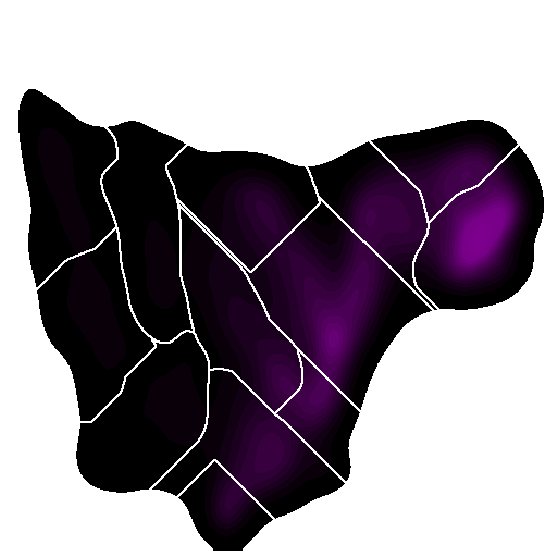

In [195]:
from skimage import measure

def compute_edges(mask):
    mask = mask.T
    # Find the contours of the mask
    contours = measure.find_contours(mask.astype(int), 0.99)
    # Convert the contours to edges
    edges = []
    for contour in contours:
        x, y = contour[:, 1], contour[:, 0]
        edges.append(list(zip(x, y)))
    return edges

def plot_edges(edges, axis):
    for e in edges:
        x, y = zip(*e)
        grid[axis].plot(y, x, color='black')

masked_data = density.T
masked_data = np.ma.masked_where(masked_data <= 3.976043926923529e-04, masked_data)
plt.figure(figsize=(10,10))
plt.imshow(masked_data, origin='lower', cmap='nipy_spectral', vmax=1) # vmax = 1 for outlines
plt.axis('off')
edges = compute_edges(masked_data.mask)


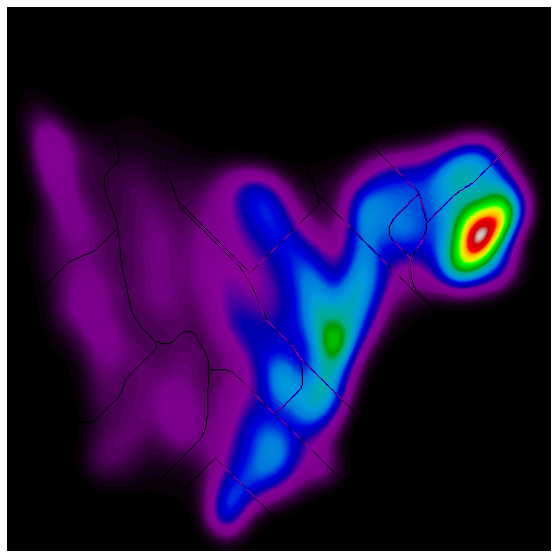

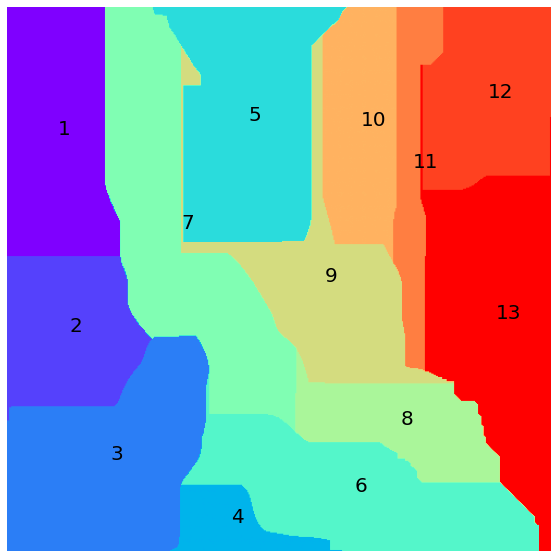

In [196]:
direct = 'E:\\data\\umap_model\\'
file = 'Feats3_100k_samples_UMAP_01mindist_50neighbors_embeddings.pickle'
file2 = 'Feats3_100k_samples_UMAP_01mindist_50neighbors_remainingEmbeddings.pickle'
data = open_sessions(direct + file)
data2join = open_sessions(direct + file2)
data = {**data, **data2join}

# concatenate all embeddings
final_embs = []
for key in data.keys():
    final_embs.append(data[key])
final_embs = np.row_stack(final_embs)

# run watershed on concatenated embeddings
labeled_map, density, xe, ye, _ = map_density(final_embs, bins=500, percentile=74.4, sigma=10) # for viz, 70 and 2.75, for decoding, 70 and 3.5
labels = embedding_labels(data, labeled_map, xe, ye, bins=500)

# derive final label set
final_labels = []
for key in labels.keys():
    final_labels.append(labels[key])
final_labels = np.concatenate(final_labels)

C:\Users\Jorge\AppData\Local\Temp\ipykernel_42296\2121607112.py:27: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im)


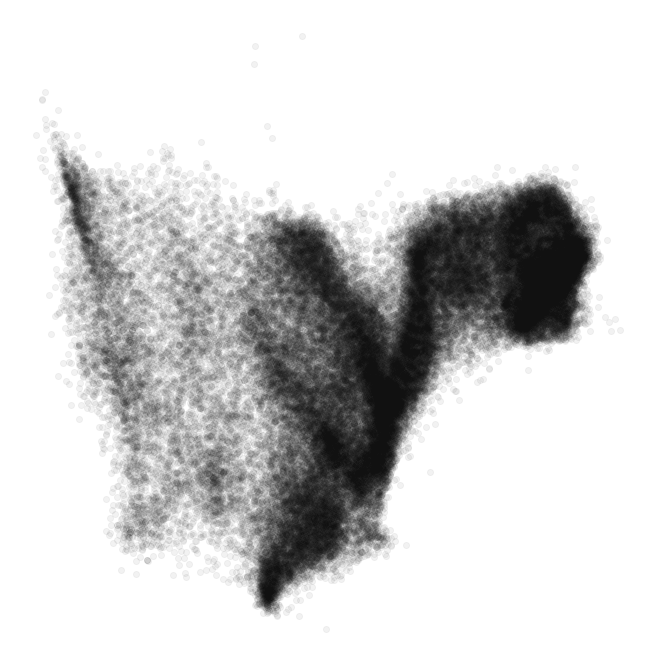

<Figure size 720x720 with 0 Axes>

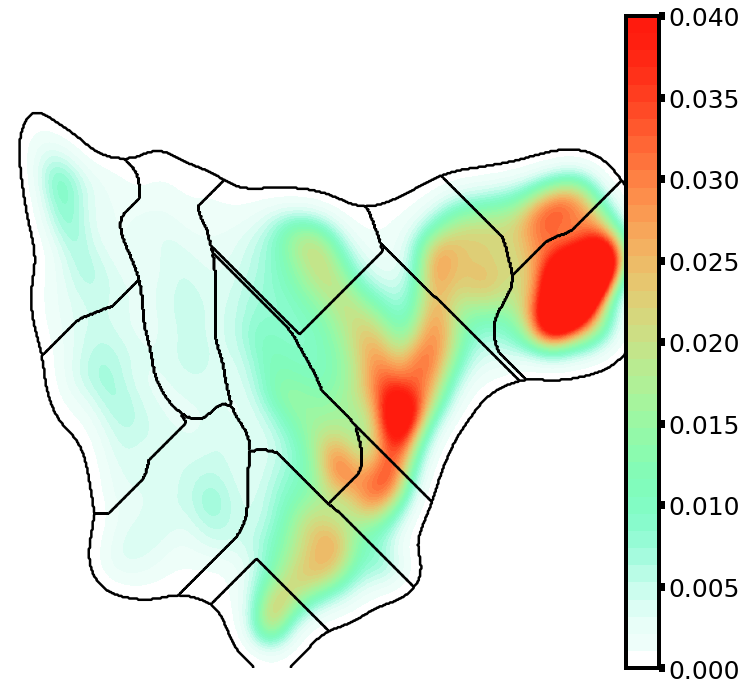

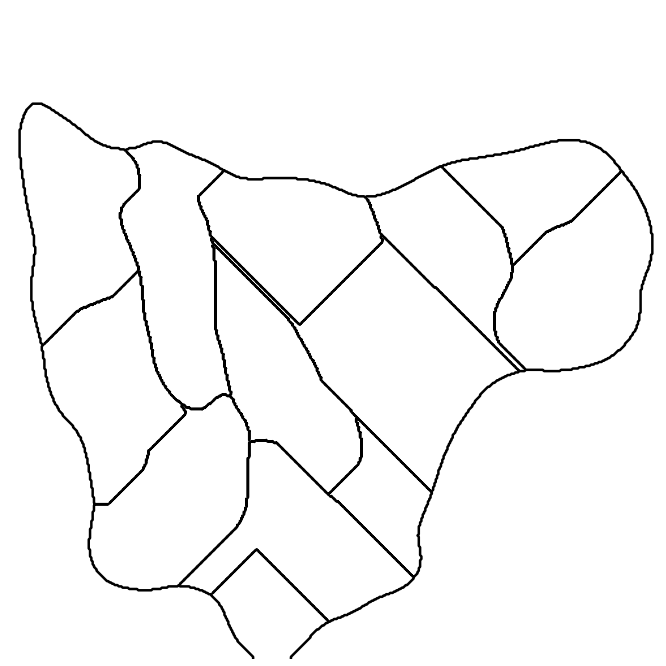

In [229]:
# define colormap
orig_cmap = get_cmap('rainbow', 126)
warm_colors = orig_cmap(np.linspace(0.4, 1, 32))  # Adjust 0.2 and 0.6 based on the colormap's warm color range
white_rows = np.array([1, 1, 1, 1] * 5).reshape(5, 4)  # 5 rows of RGBA white
warm_colors = np.vstack((white_rows, np.vstack(warm_colors)))
for col in np.arange(4):
    warm_colors[:, col] = gaussian_filter(warm_colors[:, col], sigma=3)
warm_colors = np.vstack((np.array([1, 1, 1, 1]).reshape(1, 4), np.vstack(warm_colors)))
new_cmap = ListedColormap(warm_colors)

# plot raw embedding for figure-making
plt.figure(figsize=(11.5, 12))
plt.scatter(final_embs[:, 0][::150], final_embs[:, 1][::150], color='black', alpha=0.05)
plt.axis('off')
# plt.savefig('.\\retreat_figs\\embedding_blank.png', dpi=300, bbox_inches='tight')

# plot watershed embedding
plt.figure(figsize=(10,10))
final_density, _, _ = heatmap(final_embs, bins=500, sigma=10)
fig = plt.figure(figsize=(15,12))
grid = ImageGrid(fig, 111,
                nrows_ncols = (1,1),
                axes_pad = 0.05, 
                )
im = grid[0].imshow(final_density.T, cmap=new_cmap ,origin='lower', vmax=0.04)
grid[0].axis('off')
plt.colorbar(im)
plot_edges(edges, axis=0)
plt.savefig('.\\GRC2024_figs\\watershed_embedding.svg', dpi=300, bbox_inches='tight')

# plot watershed skeleton
fig = plt.figure(figsize=(15,12))
grid = ImageGrid(fig, 111,
                nrows_ncols = (1,1),
                axes_pad = 0.05, 
                )
im = grid[0].imshow(final_density.T, cmap=new_cmap ,origin='lower', vmax=0.00)
grid[0].axis('off')
# plt.colorbar(im)
plot_edges(edges, axis=0)
# plt.savefig('.\\retreat_figs\\watershed_skeleton.png', dpi=300, bbox_inches='tight')

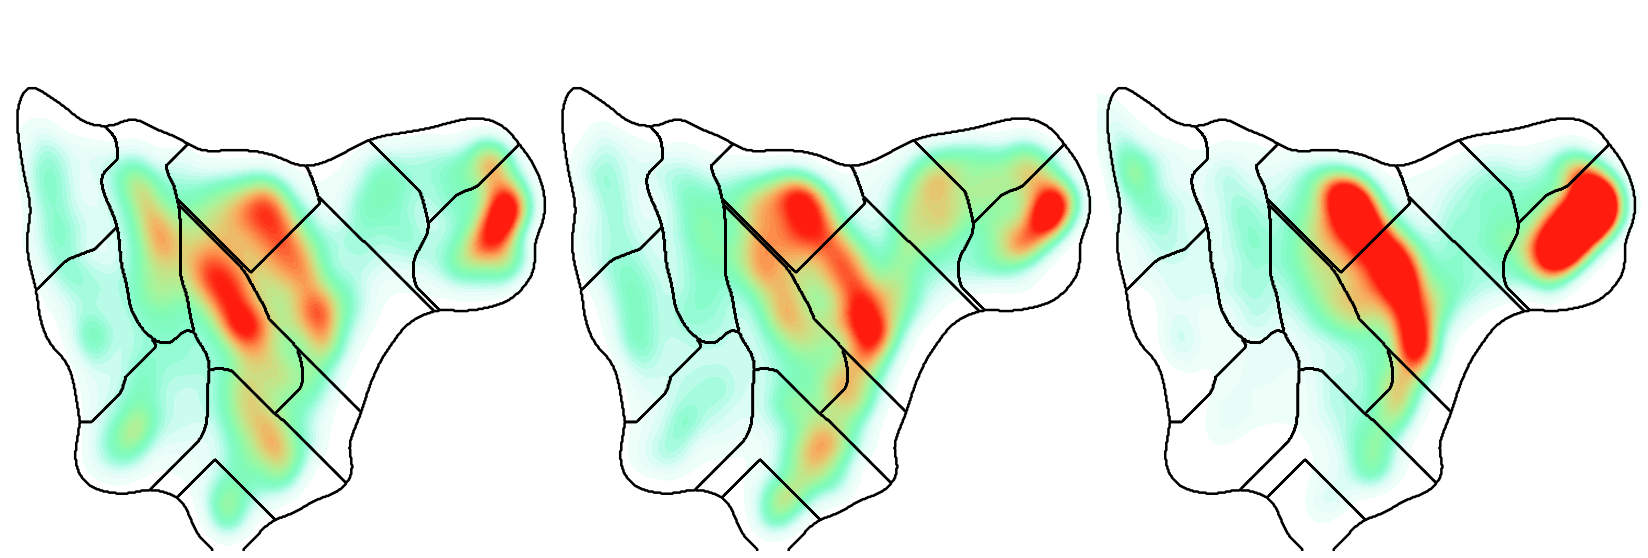

In [230]:
# generating individual heatmaps for each cd1 condition

# set up params for heatmaps
range = [[final_embs[:,0].min(), final_embs[:,0].max()], [final_embs[:,1].min(), final_embs[:,1].max()]]
bins = 500
sigma = 11

# define colormap
orig_cmap = get_cmap('rainbow', 126)
warm_colors = orig_cmap(np.linspace(0.4, 1, 32))  # Adjust 0.2 and 0.6 based on the colormap's warm color range
white_rows = np.array([1, 1, 1, 1] * 5).reshape(5, 4)  # 5 rows of RGBA white
warm_colors = np.vstack((white_rows, np.vstack(warm_colors)))
for col in np.arange(4):
    warm_colors[:, col] = gaussian_filter(warm_colors[:, col], sigma=3)
warm_colors = np.vstack((np.array([1, 1, 1, 1]).reshape(1, 4), np.vstack(warm_colors)))
new_cmap = ListedColormap(warm_colors)

# generate embeddings
agg_embs = []
for key in [x for x in list(data.keys()) if '_mCD1' in x if key not in ['29L', '30R2']] :
    agg_embs.append(data[key])
agg_embs = np.row_stack(agg_embs)
agg_density, _, _ = heatmap(agg_embs, bins=bins, sigma=sigma, axlims=range)

obs_embs = []
for key in [x for x in list(data.keys()) if '_OBSmCD1' in x] :
    obs_embs.append(data[key])
obs_embs = np.row_stack(obs_embs)
obs_density, _, _ = heatmap(obs_embs, bins=bins, sigma=sigma, axlims=range)

non_embs = []
for key in [x for x in list(data.keys()) if 'toyCD1' in x] :
    non_embs.append(data[key])
non_embs = np.row_stack(non_embs)
non_density, _, _ = heatmap(non_embs, bins=bins, sigma=sigma, axlims=range)

# putting everything together
fig = plt.figure(figsize=(30,10))
grid = ImageGrid(fig, 111,
                nrows_ncols = (1,3),
                )

im = grid[0].imshow(agg_density.T, cmap=new_cmap,origin='lower', vmin=0, vmax=0.04)
grid[0].axis('off')
plot_edges(edges, axis=0)

grid[1].imshow(obs_density.T, cmap=new_cmap,origin='lower', vmin=0, vmax=0.04)
grid[1].axis('off')
plot_edges(edges, axis=1)

grid[2].imshow(non_density.T, cmap=new_cmap,origin='lower', vmin=0, vmax=0.04)
grid[2].axis('off')
plot_edges(edges, axis=2)

# fig.colorbar(im)

cax = grid.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_rotation(270)
# plt.savefig('./DSPAN_figs/agg_obs_non_density.svg', dpi=300, bbox_inches='tight')
plt.savefig('.\\GRC2024_figs\\agg_obs_non_density.svg', dpi=300, bbox_inches='tight')

# Quantifying supervised behavior

In [156]:
def format4analysis(full_data, animal_ID, binary_labels='attack_labels', beh='agg'):

    sessions = list(full_data.keys())
    region_index, region_id = pd.factorize(region_ids)
    f = np.max([full_data[session].shape[0] for session in sessions])

    traces_lib = np.empty((f, len(region_index)+1, 27))
    traces_lib[:] = np.nan

    # package recordings into traces_lib array
    
    sessions2map = [x for x in sessions if animal_ID in x]
    if beh == 'agg':
        sessions2map = [x for x in sessions2map if '_balbc_' in x or '_mCD1_' in x]
    elif beh == 'obs':
        sessions2map = [x for x in sessions2map if '_obs_' in x or '_OBSmCD1_' in x]
    else:
        sessions2map = [x for x in sessions2map if 'toy' in x or 'toyCD1' in x]

    for i, sesh in enumerate(sessions2map):

        # format traces from each session to fit the big nan array above
        s = full_data[sesh]
        if s.shape[0] < f:
            nan_pad = np.zeros((f-s.shape[0], s.shape[1]))
            nan_pad[:] = np.nan
            nan_pad = pd.DataFrame(nan_pad, columns=s.columns)
            s = pd.concat([s, nan_pad], axis=0)

        # copy columns at specific locations
        for idx, roi in zip(region_index, region_id):
            try: 
                traces_lib[:, idx, i] = s[roi]
            except KeyError:
                traces_lib[:, idx, i] = np.nan
        try:
            traces_lib[:, -1, i] = s[binary_labels]
        except KeyError:
            traces_lib[:, -1, i] = np.nan
        
    return traces_lib, s.columns

def produce_XY(epoch):
    
    epoch_df = pd.DataFrame()
    for i in range(epoch.shape[-1]):
        epoch_df = pd.concat([epoch_df, pd.DataFrame(epoch[:, :, i])])
    concat_sessions = epoch_df.to_numpy()
    filtered_sessions = concat_sessions[np.invert(np.isnan(concat_sessions[:, -1]))]

    X = filtered_sessions[:, :-1]
    orig_X = X.copy()
    if np.isnan(X).any(axis=0).any(): # remove columns with nan
        has_nan = np.isnan(X).any(axis=0)
        X = X[:, ~has_nan]
    y_init = filtered_sessions[:, -1]
    y = y_init.astype(int).reshape(-1,1)

    return X, y
    
def get_indices(partial_list):
    present_indices = [indices[val] for val in partial_list if val in indices]
    not_present = [val for val in np.arange(len(region_ids)) if val not in present_indices]
    return present_indices, not_present
    
def add_nan_values(matrix, rois, n_features=22):
    
    if len(rois) < n_features: 
        
        # Get roi indices
        pres_idxs, miss_idxs = get_indices(rois)
        # Create a copy of the original matrix to avoid modifying it
        matrix_copy = matrix.copy()
        # Create a 1D boolean mask that indicates where to add NaN values
        nan_mask = np.zeros(matrix_copy.shape[2], dtype=bool)
        print(miss_idxs)
        nan_mask[miss_idxs] = True
        # Add NaN values to the matrix
        matrix_copy = np.insert(matrix_copy, miss_idxs, np.nan, axis=2)
                
        return matrix_copy
    
    else:
        
        return matrix

def extract_events_of_interest(labels):
    events = []
    indices = []
    start_idx = None

    for i in range(len(labels)):
        if labels[i] == 1:
            if start_idx is None:
                start_idx = i
            indices.append(i)
        elif start_idx is not None:
            if len(indices) >= 8:
                events.append(indices)
            start_idx = None
            indices = []

    if start_idx is not None and len(indices) >= 1:
        events.append(np.asarray(indices))
    return events

In [464]:
def extract_dictionary(full_data, animals, beh='agg', binary_labels='attack labels', n_features=22):
    ntrials = np.zeros((len(animals), 27))
    occupancies = ntrials.copy()
    durations = ntrials.copy()
    latencies = ntrials.copy()
    dicti = {}

    for a, animal in enumerate(animals):

        trial_comps, rois = format4analysis(full_data, animal, beh=beh, binary_labels=binary_labels)
        rois = rois[:-3]

        all_behs = []

        for i in np.arange(trial_comps.shape[2]):    

            y = trial_comps[:, -1, i]
            y = y[~np.isnan(y)]

            events = extract_events_of_interest(y)
            all_behs.append(events)
            ntrials[a, i] = len(events)
            try:
                stacked_events = np.hstack(events)
                occupancies[a, i] =len(stacked_events)/len(y) # seconds
                latencies[a, i] = stacked_events[0]/40
                durations[a, i] = np.mean([len(x)/40 for x in events])
            except ValueError:
                occupancies[a, i] = 0
                latencies[a, i] = y.shape[0]/40
                durations[a, i] = np.nan

        dicti[animal] = all_behs
    
    return ntrials, occupancies, durations, latencies, dicti

region_ids = ['PrL (E)', 'PrL (I)', 'vLS (E)', 'vLS (I)', 'POA (E)', 'POA (I)',
       'BNST (E)', 'BNST (I)', 'AH (E)', 'AH (I)', 'MeA (E)', 'MeA (I)',
       'VMH (E)', 'VMH (I)', 'PAG (E)', 'PAG (I)', 'PMv (E)', 'PMv (I)', 'LHb (E)', 'LHb (I)',
       'PA (E)', 'PA (I)', 'NAc (DA)']

agg_trials, agg_occupancies, agg_durations, agg_latencies, agg_dict = extract_dictionary(full_data, agg_animals, 'agg')
obs_trials, obs_occupancies, obs_durations, obs_latencies, obs_dict = extract_dictionary(full_data, obs_animals, 'obs')
non_trials, non_occupancies, non_durations, non_latencies, non_dict = extract_dictionary(full_data, non_animals, 'non')

AGG n = 30
OBS n = 21
NON n = 18
[0.016767552972451916, 0.02632088110868236]
AGG vs NON: 0.026321
KS = 0.444444
OBS vs NON: 0.026321
KS = 0.452381


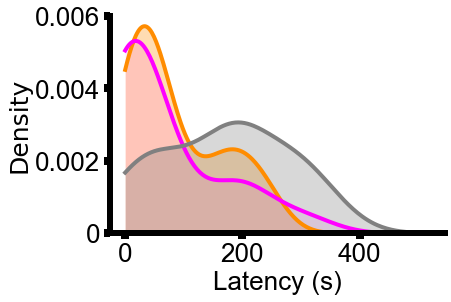

In [406]:
agg_distbs = agg_latencies[:, -3:].flatten()
agg_distbs = agg_distbs[~np.isnan(agg_distbs)]

obs_distbs = obs_latencies[:, -3:].flatten()
obs_distbs = obs_distbs[~np.isnan(obs_distbs)]

non_distbs = non_latencies[:, -3:].flatten()
non_distbs = non_distbs[~np.isnan(non_distbs)]

# plot everything

lw=4
fig, ax = plt.subplots(figsize=(6, 4))
sns.kdeplot(agg_distbs, ax=ax, color='darkorange', multiple='layer', fill=True, alpha=0.3, lw=0, clip=(0, None))
sns.kdeplot(agg_distbs, ax=ax, color='darkorange', lw=lw, clip=(0, None))
sns.kdeplot(obs_distbs, ax=ax, color='magenta', multiple='layer', fill=True, alpha=0.1, lw=0, clip=(0, None))
sns.kdeplot(obs_distbs, ax=ax, color='magenta', lw=lw, clip=(0, None))
sns.kdeplot(non_distbs, ax=ax, color='grey', multiple='layer', fill=True, alpha=0.3, lw=0, clip=(0, None))
sns.kdeplot(non_distbs, ax=ax, color='grey', lw=lw, clip=(0, None))

# stats
print('AGG n = %d' % (len(agg_distbs)))
print('OBS n = %d' % (len(obs_distbs)))
print('NON n = %d' % (len(non_distbs)))
KS1, p_value1 = ks_2samp(agg_distbs, non_distbs)
KS2, p_value2 = ks_2samp(obs_distbs, non_distbs)
pvalues = [p_value1, p_value2]
print(pvalues)
_, pvals_corrected, _, _ = multipletests(pvalues, method='fdr_bh')
print('AGG vs NON: %f' % (pvals_corrected[0]))
print('KS = %f' % (KS1))
print('OBS vs NON: %f' % (pvals_corrected[1]))
print('KS = %f' % (KS2))
ax.set_yticks([0, 0.002, 0.004, 0.006])
ax.set_yticklabels([0, 0.002, 0.004, 0.006], fontfamily='Arial', fontsize=26)
ax.set_xticks([0, 200, 400])
ax.set_xticklabels([0, 200, 400], fontfamily='Arial', fontsize=26)
ax.set_xlabel('Latency (s)', fontfamily='Arial', fontsize=26)
sns.despine()
plt.savefig('.\\figures\\latency_distbs.svg', dpi=300, bbox_inches='tight')

AGG vs NON: 0.324663
OBS vs NON: 0.742459


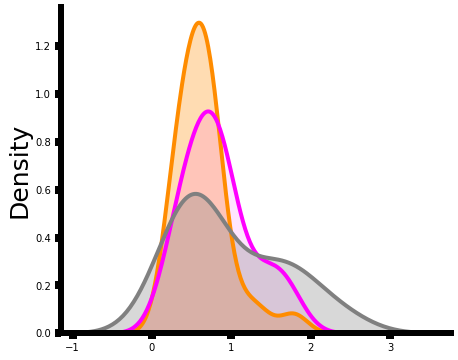

In [192]:
agg_distbs = agg_durations[:, -3:].flatten()
agg_distbs = agg_distbs[~np.isnan(agg_distbs)]

obs_distbs = obs_durations[:, -3:].flatten()
obs_distbs = obs_distbs[~np.isnan(obs_distbs)]

non_distbs = non_durations[:, -3:].flatten()
non_distbs = non_distbs[~np.isnan(non_distbs)]

# plot everything

lw=4
fig, ax = plt.subplots(figsize=(7, 6))
sns.kdeplot(agg_distbs, ax=ax, color='darkorange', multiple='layer', fill=True, alpha=0.3, lw=0)
sns.kdeplot(agg_distbs, ax=ax, color='darkorange', lw=lw)
sns.kdeplot(obs_distbs, ax=ax, color='magenta', multiple='layer', fill=True, alpha=0.1, lw=0)
sns.kdeplot(obs_distbs, ax=ax, color='magenta', lw=lw)
sns.kdeplot(non_distbs, ax=ax, color='grey', multiple='layer', fill=True, alpha=0.3, lw=0)
sns.kdeplot(non_distbs, ax=ax, color='grey', lw=lw)

# stats
_, p_value1 = ks_2samp(agg_distbs, non_distbs)
_, p_value2 = ks_2samp(obs_distbs, non_distbs)
pvalues = [p_value1, p_value2]
_, pvals_corrected, _, _ = multipletests(pvalues, method='fdr_bh')
print('AGG vs NON: %f' % (pvals_corrected[0]))
print('OBS vs NON: %f' % (pvals_corrected[1]))
# ax.set_yticks([0, 0.002, 0.004, 0.006])
# ax.set_yticklabels([0, 0.002, 0.004, 0.006], fontfamily='Arial', fontsize=32)
# ax.set_xticks([0, 200, 400], [0, 5, 10])
# ax.set_xticklabels([0, 5, 10], fontfamily='Arial', fontsize=32)
# ax.set_xlabel('Latency (s)', fontfamily='Arial', fontsize=32)
sns.despine()
# plt.savefig('.\\figures\\latency_distbs.svg', dpi=300, bbox_inches='tight')

AGG vs NON: 0.300675
OBS vs NON: 0.300675


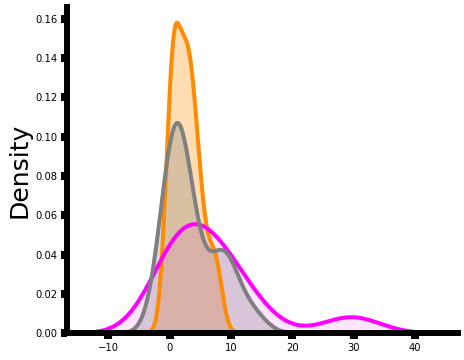

In [193]:
agg_distbs = agg_occupancies[:, -3:].flatten()
agg_distbs = agg_distbs[~np.isnan(agg_distbs)]

obs_distbs = obs_occupancies[:, -3:].flatten()
obs_distbs = obs_distbs[~np.isnan(obs_distbs)]

non_distbs = non_occupancies[:, -3:].flatten()
non_distbs = non_distbs[~np.isnan(non_distbs)]

# plot everything

lw=4
fig, ax = plt.subplots(figsize=(7, 6))
sns.kdeplot(agg_distbs, ax=ax, color='darkorange', multiple='layer', fill=True, alpha=0.3, lw=0)
sns.kdeplot(agg_distbs, ax=ax, color='darkorange', lw=lw)
sns.kdeplot(obs_distbs, ax=ax, color='magenta', multiple='layer', fill=True, alpha=0.1, lw=0)
sns.kdeplot(obs_distbs, ax=ax, color='magenta', lw=lw)
sns.kdeplot(non_distbs, ax=ax, color='grey', multiple='layer', fill=True, alpha=0.3, lw=0)
sns.kdeplot(non_distbs, ax=ax, color='grey', lw=lw)

# stats
_, p_value1 = ks_2samp(agg_distbs, non_distbs)
_, p_value2 = ks_2samp(obs_distbs, non_distbs)
pvalues = [p_value1, p_value2]
_, pvals_corrected, _, _ = multipletests(pvalues, method='fdr_bh')
print('AGG vs NON: %f' % (pvals_corrected[0]))
print('OBS vs NON: %f' % (pvals_corrected[1]))
sns.despine()

AGG vs NON: 0.914440
OBS vs NON: 0.201973


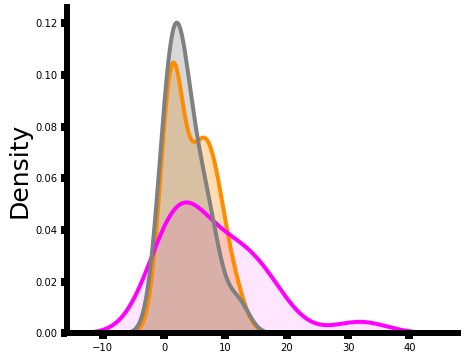

In [194]:
agg_distbs = agg_trials[:, -3:].flatten()
agg_distbs = agg_distbs[~np.isnan(agg_distbs)]

obs_distbs = obs_trials[:, -3:].flatten()
obs_distbs = obs_distbs[~np.isnan(obs_distbs)]

non_distbs = non_trials[:, -3:].flatten()
non_distbs = non_distbs[~np.isnan(non_distbs)]

# plot everything

lw=4
fig, ax = plt.subplots(figsize=(7, 6))
sns.kdeplot(agg_distbs, ax=ax, color='darkorange', multiple='layer', fill=True, alpha=0.3, lw=0)
sns.kdeplot(agg_distbs, ax=ax, color='darkorange', lw=lw)
sns.kdeplot(obs_distbs, ax=ax, color='magenta', multiple='layer', fill=True, alpha=0.1, lw=0)
sns.kdeplot(obs_distbs, ax=ax, color='magenta', lw=lw)
sns.kdeplot(non_distbs, ax=ax, color='grey', multiple='layer', fill=True, alpha=0.3, lw=0)
sns.kdeplot(non_distbs, ax=ax, color='grey', lw=lw)

# stats
_, p_value1 = ks_2samp(agg_distbs, non_distbs)
_, p_value2 = ks_2samp(obs_distbs, non_distbs)
pvalues = [p_value1, p_value2]
_, pvals_corrected, _, _ = multipletests(pvalues, method='fdr_bh')
print('AGG vs NON: %f' % (pvals_corrected[0]))
print('OBS vs NON: %f' % (pvals_corrected[1]))
sns.despine()

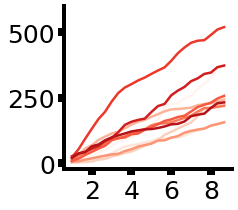

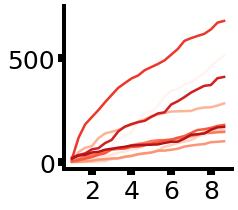

In [33]:
### beh plots

sns.set_context(rc={'lines.linewidth': 2.5,
                    'axes.labelsize': 25,
                    'axes.titlesize': 19.200000000000003,
                    'font.size': 25,
                    'xtick.major.width': 8,
                    'ytick.major.width': 8,
                    'xtick.major.size':6,
                    'ytick.major.size':6,
                    'axes.linewidth':4})

# Specify the start and end colors of the gradient
start_color = '#FF0000'  # Red
end_color = '#FF0000'  # Red

# Generate the color gradient
gradient = np.linspace(0, 1, 12)
colors = [plt.cm.get_cmap('Reds')(x) for x in gradient]

for i, e in enumerate([agg_trials, agg_occupancies]):

    plt.figure(figsize=(3, 3))
    for animal, trial, color in zip(agg_animals, e, colors):
        cumulative_trials = np.cumsum(trial)[:-3]
        plt.plot(cumulative_trials, label=animal, color=color)

    sns.despine()
    plt.xticks(np.arange(3, 24, 6), np.arange(2, 9, 2))
    if i == 0:
        plt.ylim(top=600)
        plt.savefig('.\\figures\\paper_figs\\agg_trial_cumulative.svg', dpi=300, bbox_inches='tight')
    else:
        plt.ylim(top=750)
        plt.savefig('.\\figures\\paper_figs\\agg_occupancies_cumulative.svg', dpi=300, bbox_inches='tight')
    
    

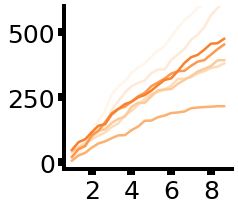

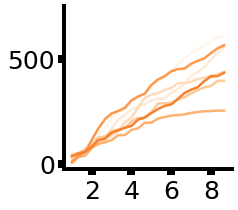

In [32]:
# Specify the start and end colors of the gradient
start_color = '#FFA500'  # Orange
end_color = '#FFA500'  # Orange

# Generate the color gradient
gradient = np.linspace(0, 1, 12)
colors = [plt.cm.get_cmap('Oranges')(x) for x in gradient]

for i, e in enumerate([obs_trials, obs_occupancies]):

    plt.figure(figsize=(3, 3))
    for animal, trial, color in zip(obs_animals, e, colors):
        cumulative_trials = np.cumsum(trial)[:-3]
        plt.plot(cumulative_trials, label=animal, color=color)

    sns.despine()
    plt.xticks(np.arange(3, 24, 6), np.arange(2, 9, 2))
    if i == 0:
        plt.ylim(top=600)
        plt.savefig('.\\figures\\paper_figs\\obs_trial_cumulative.svg', dpi=300, bbox_inches='tight')
    else:
        plt.ylim(top=750)
        plt.savefig('.\\figures\\paper_figs\\obs_occupancies_cumulative.svg', dpi=300, bbox_inches='tight')

Late vs Early Occupancy: 0.813281
KS statistic: 0.116667
N = 60
Late vs Early Latency: 0.004627
KS statistic: 0.316667
N = 60
Late vs Early Duration: 0.182057
KS statistic: 0.200000
N = 60


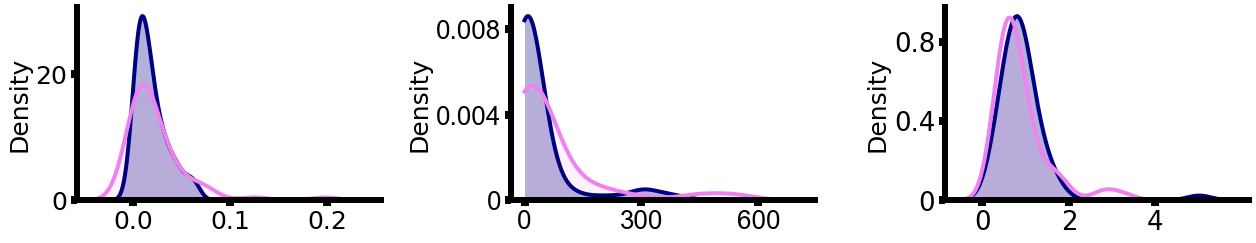

In [467]:
early_period = [0, 6]
late_period = [-9, -3]
fig, ax = plt.subplots(1,3, figsize=(18, 4))
###
late_occupancies = agg_occupancies[:, late_period[0]:late_period[1]].flatten()
early_occupancies = agg_occupancies[:, early_period[0]:early_period[1]].flatten()
sns.kdeplot(late_occupancies, ax=ax[0], color='navy', multiple='layer', fill=True, alpha=0.3, lw=0)
sns.kdeplot(late_occupancies, ax=ax[0], color='navy', lw=lw)
sns.kdeplot(early_occupancies, ax=ax[0], color='violet', multiple='layer', fill=True, alpha=0.1, lw=0)
sns.kdeplot(early_occupancies, ax=ax[0], color='violet', lw=lw)
KS, p_value = ks_2samp(late_occupancies, early_occupancies)
print('Late vs Early Occupancy: %f' % (p_value))
print('KS statistic: %f' % (KS))
print('N = %d' % (len(early_occupancies)))
###
late_latencies = agg_latencies[:, late_period[0]:late_period[1]].flatten()
early_latencies = agg_latencies[:, early_period[0]:early_period[1]].flatten()
sns.kdeplot(late_latencies, ax=ax[1], color='navy', multiple='layer', fill=True, alpha=0.3, lw=0, clip=(0, None))
sns.kdeplot(late_latencies, ax=ax[1], color='navy', lw=lw, clip=(0, None))
sns.kdeplot(early_latencies, ax=ax[1], color='violet', multiple='layer', fill=True, alpha=0.1, lw=0, clip=(0, None))
sns.kdeplot(early_latencies, ax=ax[1], color='violet', lw=lw, clip=(0, None))
ax[1].set_yticks([0, 0.004, 0.008])
ax[1].set_yticklabels([0, 0.004, 0.008], fontsize=26, fontfamily='Arial')
ax[1].set_xticks([0, 300, 600])
ax[1].set_xticklabels([0, 300, 600], fontsize=26, fontfamily='Arial')
KS, p_value = ks_2samp(late_latencies, early_latencies)
print('Late vs Early Latency: %f' % (p_value))
print('KS statistic: %f' % (KS))
print('N = %d' % (len(early_latencies)))
###
late_durations = agg_durations[:, late_period[0]:late_period[1]].flatten()
early_durations = agg_durations[:, early_period[0]:early_period[1]].flatten()
sns.kdeplot(late_durations, ax=ax[2], color='navy', multiple='layer', fill=True, alpha=0.3, lw=0)
sns.kdeplot(late_durations, ax=ax[2], color='navy', lw=lw)
sns.kdeplot(early_durations, ax=ax[2], color='violet', multiple='layer', fill=True, alpha=0.1, lw=0)
sns.kdeplot(early_durations, ax=ax[2], color='violet', lw=lw)
ax[2].set_yticks([0, 0.4, 0.8])
ax[2].set_yticklabels([0, 0.4, 0.8], fontsize=26)
ax[2].set_xticks([0, 2,4])
ax[2].set_xticklabels([0, 2,4], fontsize=26)
KS, p_value = ks_2samp(late_durations, early_durations)
print('Late vs Early Duration: %f' % (p_value))
print('KS statistic: %f' % (KS))
print('N = %d' % (len(early_durations)))
plt.tight_layout()
sns.despine()
# plt.savefig('.\\figures\\agg_attack_distributions.svg', dpi=300, bbox_inches='tight')




H = 2.112988, p = 0.347673
###


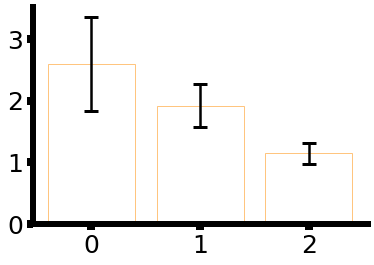

In [452]:
from scipy.stats import sem
sns.set_context(rc={'lines.linewidth': 2.5,
                    'axes.labelsize': 25,
                    'axes.titlesize': 19.200000000000003,
                    'font.size': 25,
                    'xtick.major.width': 8,
                    'ytick.major.width': 8,
                    'xtick.major.size':6,
                    'ytick.major.size':6,
                    'axes.linewidth':6})

d1_occupancy = agg_occupancies[:, :3].flatten()
d8_occupancy = agg_occupancies[:, -6:-3].flatten()
d9_occupancy = agg_occupancies[:, -3:].flatten()

plt.bar(0, np.mean(d1_occupancy)*100, yerr=sem(d1_occupancy)*100, edgecolor='darkorange', color='white', alpha=0.5, capsize=7, error_kw={'capthick': 3})
plt.bar(1, np.mean(d8_occupancy)*100, yerr=sem(d8_occupancy)*100, edgecolor='darkorange', color='white', alpha=0.5, capsize=7,  error_kw={'capthick': 3})
plt.bar(2, np.mean(d9_occupancy)*100, yerr=sem(d9_occupancy)*100, edgecolor='darkorange', color='white', alpha=0.5, capsize=7,  error_kw={'capthick': 3})
sns.despine()

# stats
run_cluster_stats([d1_occupancy, d8_occupancy, d9_occupancy])
# plt.savefig('.\\figures\\agg_occupancy.svg', dpi=300, bbox_inches='tight')

H = 2.713572, p = 0.257487
###


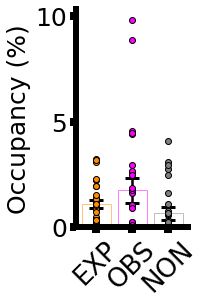

In [460]:
from scipy.stats import sem
sns.set_context(rc={'lines.linewidth': 2.5,
                    'axes.labelsize': 25,
                    'axes.titlesize': 19.200000000000003,
                    'font.size': 25,
                    'xtick.major.width': 8,
                    'ytick.major.width': 8,
                    'xtick.major.size':6,
                    'ytick.major.size':6,
                    'axes.linewidth':6})

plt.figure(figsize=(2, 4))

agg_HF = np.median(agg_occupancies[:, -3:], axis=-1)
agg_HF = agg_occupancies[:, -3:].flatten()
obs_HF = np.median(obs_occupancies[:, -3:], axis=-1)
obs_HF = obs_occupancies[:, -3:].flatten()
non_HF = np.median(non_occupancies[:, -3:], axis=-1)
non_HF = non_occupancies[:, -3:].flatten()

# Plot bar plots
plt.bar(0, np.median(agg_HF)*100, yerr=sem(agg_HF)*100, edgecolor='darkorange', color='white', alpha=0.5, capsize=7, error_kw={'capthick': 3})
plt.bar(1, np.median(obs_HF)*100, yerr=sem(obs_HF)*100, edgecolor='magenta', color='white', alpha=0.5, capsize=7,  error_kw={'capthick': 3})
plt.bar(2, np.median(non_HF)*100, yerr=sem(non_HF)*100, edgecolor='gray', color='white', alpha=0.5, capsize=7,  error_kw={'capthick': 3})

# Plot individual data points
plt.scatter(np.full_like(agg_HF, 0), agg_HF*100, color='darkorange', edgecolor='black', zorder=2)
plt.scatter(np.full_like(obs_HF, 1), obs_HF*100, color='magenta', edgecolor='black', zorder=2)
plt.scatter(np.full_like(non_HF, 2), non_HF*100, color='gray', edgecolor='black', zorder=2)

# Set axis labels and ticks
plt.ylabel('Occupancy (%)')
plt.xticks([0, 1, 2], ['EXP', 'OBS', 'NON'], fontsize=26, rotation=45)

sns.despine()

# stats
run_cluster_stats([agg_HF, obs_HF, non_HF])
# plt.savefig('.\\figures\\agg_occupancy.svg', dpi=300, bbox_inches='tight')